## Problem Statement:
Have you ever wondered how many hotel bookings are canceled or what is the peak time for the hotel? This hotel booking dataset can help you explore these questions! This dataset comprehends bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

## **We have to build a decision tree model to predict whether a hotel booking is canceled or not.**

**Data Description:**

- **hotel:** Hotel type (H1 = Resort Hotel or H2 = City Hotel).
- **is_canceled:** Indicates if the booking was canceled (1) or not (0).
- **lead_time:** Days between the booking date and the arrival date.
- **arrival_date_year:** Year of arrival.
- **arrival_date_month:** Month of arrival.
- **arrival_date_week_number:** Week number of the year for the arrival date.
- **arrival_date_day_of_month:** Day of the month of arrival.
- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) stayed or booked.
- **stays_in_week_nights:** Number of week nights (Monday to Friday) stayed or booked.
- **adults:** Number of adults.
- **children:** Number of children.
- **babies:** Number of babies.
- **meal:** Type of meal booked:
  - Undefined/SC – No meal package
  - BB – Bed & Breakfast
  - HB – Half board (breakfast and one other meal, usually dinner)
  - FB – Full board (breakfast, lunch, and dinner)
- **country:** Country of origin (ISO 3155–3:2013 format).
- **market_segment:** Market segment designation:
  - "TA" means "Travel Agents"
  - "TO" means "Tour Operators"
- **distribution_channel:** Booking distribution channel:
  - "TA" means "Travel Agents"
  - "TO" means "Tour Operators"
- **is_repeated_guest:** Indicates if the booking name was from a repeated guest (1) or not (0).
- **previous_cancellations:** Number of previous bookings canceled by the customer.
- **previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer.
- **reserved_room_type:** Code of reserved room type (anonymized).
- **assigned_room_type:** Code of assigned room type (may differ from reserved room type due to operational reasons or customer requests; anonymized).
- **booking_changes:** Number of changes/amendments made to the booking.
- **deposit_type:** Type of deposit made:
  - No Deposit – No deposit made
  - Non Refund – Deposit made equal to the total stay cost
  - Refundable – Deposit made less than the total stay cost
- **agent:** ID of the travel agency that made the booking (anonymized).
- **company:** ID of the company/entity responsible for the booking or payment (anonymized).
- **days_in_waiting_list:** Number of days the booking was on the waiting list.
- **customer_type:** Type of booking:
  - Contract – Booking has an allotment or contract associated
  - Group – Booking is associated with a group
  - Transient – Booking is not part of a group or contract
  - Transient-party – Transient booking associated with at least one other transient booking
- **adr:** Average Daily Rate (total lodging transactions divided by total staying nights).
- **required_car_parking_spaces:** Number of car parking spaces required.
- **total_of_special_requests:** Number of special requests (e.g., twin bed, high floor).
- **reservation_status:** Last status of the reservation:
  - Canceled – Booking was canceled
  - Check-Out – Customer checked in and departed
  - No-Show – Customer did not check in and did not inform the hotel
- **reservation_status_date:** Date when the last reservation status was set.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [150]:
df = pd.read_csv('/content/sample_data/hotel (6).csv')
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

## Data Preprocessing

In [151]:
# Define encoding dictionaries
hotel_enc = {
    'Resort Hotel': 1,
    'City Hotel': 2
}

meal_enc = {
    'Undefined': 0,
    'SC': 1,
    'BB': 2,
    'HB': 3,
    'FB': 4
}

market_segment_enc = {
    'Direct': 1,
    'Corporate': 2,
    'Online TA': 3,
    'Offline TA/TO': 4,
    'Complementary': 5,
    'Groups': 6,
    'Undefined': 0
}

distribution_channel_enc = {
    'Direct': 1,
    'Corporate': 2,
    'TA/TO': 3,
    'Undefined': 0
}

deposit_type_enc = {
    'No Deposit': 1,
    'Non Refund': 2,
    'Refundable': 3
}

customer_type_enc = {
    'Contract': 1,
    'Group': 2,
    'Transient': 3,
    'Transient-party': 4
}

reservation_status_enc = {
    'Canceled': 1,
    'Check-Out': 2,
    'No-Show': 3
}


In [152]:
# Apply the encodings using the dictionaries
df['hotel'] = df['hotel'].map(hotel_enc)
df['meal'] = df['meal'].map(meal_enc)
df['market_segment'] = df['market_segment'].map(market_segment_enc)
df['distribution_channel'] = df['distribution_channel'].map(distribution_channel_enc)
df['deposit_type'] = df['deposit_type'].map(deposit_type_enc)
df['customer_type'] = df['customer_type'].map(customer_type_enc)
df['reservation_status'] = df['reservation_status'].map(reservation_status_enc)


In [153]:
df

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0           1            0        342               2015               July   
1           1            0        737               2015               July   
2           1            0          7               2015               July   
3           1            0         13               2015               July   
4           1            0         14               2015               July   
...       ...          ...        ...                ...                ...   
119385      2            0         23               2017             August   
119386      2            0        102               2017             August   
119387      2            0         34               2017             August   
119388      2            0        109               2017             August   
119389      2            0        205               2017             August   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                             0                     0       2  ...   
1                             0                     0       2  ...   
2                             0                     1       1  ...   
3                             0                     1       1  ...   
4                             0                     2       2  ...   
...                         ...                   ...     ...  ...   
119385                        2                     5       2  ...   
119386                        2                     5       3  ...   
119387                        2                     5       2  ...   
119388                        2                     5       2  ...   
119389                        2                     7       2  ...   

        deposit_type  agent  company days_in_waiting_list  customer_type  \
0                  1    NaN      NaN                    0            3.0   
1                  1    NaN      NaN                    0            3.0   
2                  1    NaN      NaN                    0            3.0   
3                  1  304.0      NaN                    0            3.0   
4                  1  240.0      NaN                    0            3.0   
...              ...    ...      ...                  ...            ...   
119385             1  394.0      NaN                    0            3.0   
119386             1    9.0      NaN                    0            3.0   
119387             1    9.0      NaN                    0            3.0   
119388             1   89.0      NaN                    0            3.0   
119389             1    9.0      NaN                    0            3.0   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0                          0   
1         0.00                            0                          0   
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
...        ...                          ...                        ...   
119385   96.14                

In [154]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [155]:
df['meal']

0         2
1         2
2         2
3         2
4         2
         ..
119385    2
119386    2
119387    2
119388    2
119389    3
Name: meal, Length: 119390, dtype: int64

In [156]:
df.shape

(119390, 32)

In [157]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                       237
distribution_channel                 193
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [158]:
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [159]:
df.fillna(0, inplace=True)

In [160]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [161]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [162]:
df.describe().round()

hotel  is_canceled  lead_time  arrival_date_year  \
count  119390.0     119390.0   119390.0           119390.0   
mean        2.0          0.0      104.0             2016.0   
std         0.0          0.0      107.0                1.0   
min         1.0          0.0        0.0             2015.0   
25%         1.0          0.0       18.0             2016.0   
50%         2.0          0.0       69.0             2016.0   
75%         2.0          1.0      160.0             2017.0   
max         2.0          1.0      737.0             2017.0   

       arrival_date_week_number  arrival_date_day_of_month  \
count                  119390.0                   119390.0   
mean                       27.0                       16.0   
std                        14.0                        9.0   
min                         1.0                        1.0   
25%                        16.0                        8.0   
50%                        28.0                       16.0   
75%                        38.0                       23.0   
max                        53.0                       31.0   

       stays_in_weekend_nights  stays_in_week_nights    adults  children  ...  \
count                 119390.0              119390.0  119390.0  119390.0  ...   
mean                       1.0                   3.0       2.0       0.0  ...   
std                        1.0                   2.0       1.0       0.0  ...   
min                        0.0                   0.0       0.0       0.0  ...   
25%                        0.0                   1.0       2.0       0.0  ...   
50%                        1.0                   2.0       2.0       0.0  ...   
75%                        2.0                   3.0       2.0       0.0  ...   
max                       19.0                  50.0      55.0      10.0  ...   

       booking_changes  deposit_type     agent   company  \
count         119390.0      119390.0  119390.0  119390.0   
mean               0.0           1.0      75.0      11.0   
std                1.0           0.0     107.0      54.0   
min                0.0           1.0       0.0       0.0   
25%                0.0           1.0       7.0       0.0   
50%                0.0           1.0       9.0       0.0   
75%                0.0           1.0     152.0       0.0   
max               21.0           3.0     535.0     543.0   

       days_in_waiting_list  customer_type       adr  \
count              119390.0       119390.0  119390.0   
mean                    2.0            2.0     102.0   
std                    18.0            1.0      51.0   
min                     0.0            0.0      -6.0   
25%                     0.0            3.0      69.0   
50%                     0.0            3.0      95.0   
75%                     0.0            3.0     126.0   
max                   391.0            3.0    5400.0   

       required_car_parking_spaces  total_of_special_requests  \
count                     119390.0                   119390.0   
mean                           0.0                        1.0   
std                            0.0                        1.0   
min                            0.0                        0.0   
25%                            0.0                        0.0   
50%                            0.0                        0.0   
75%                            0.0                        1.0   
max                            8.0                        5.0   

       reservation_status  
count            119390.0  
mean                  2.0  
std                   0.0  
min                   1.0  
25%                   1.0  
50%                   2.0  
75%                   2.0  
max                   3.0  

[8 rows x 27 columns]

In [163]:
df.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
country                            object
market_segment                    float64
distribution_channel              float64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                        int64
agent                             

changing df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']) to datatime datatype

In [164]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

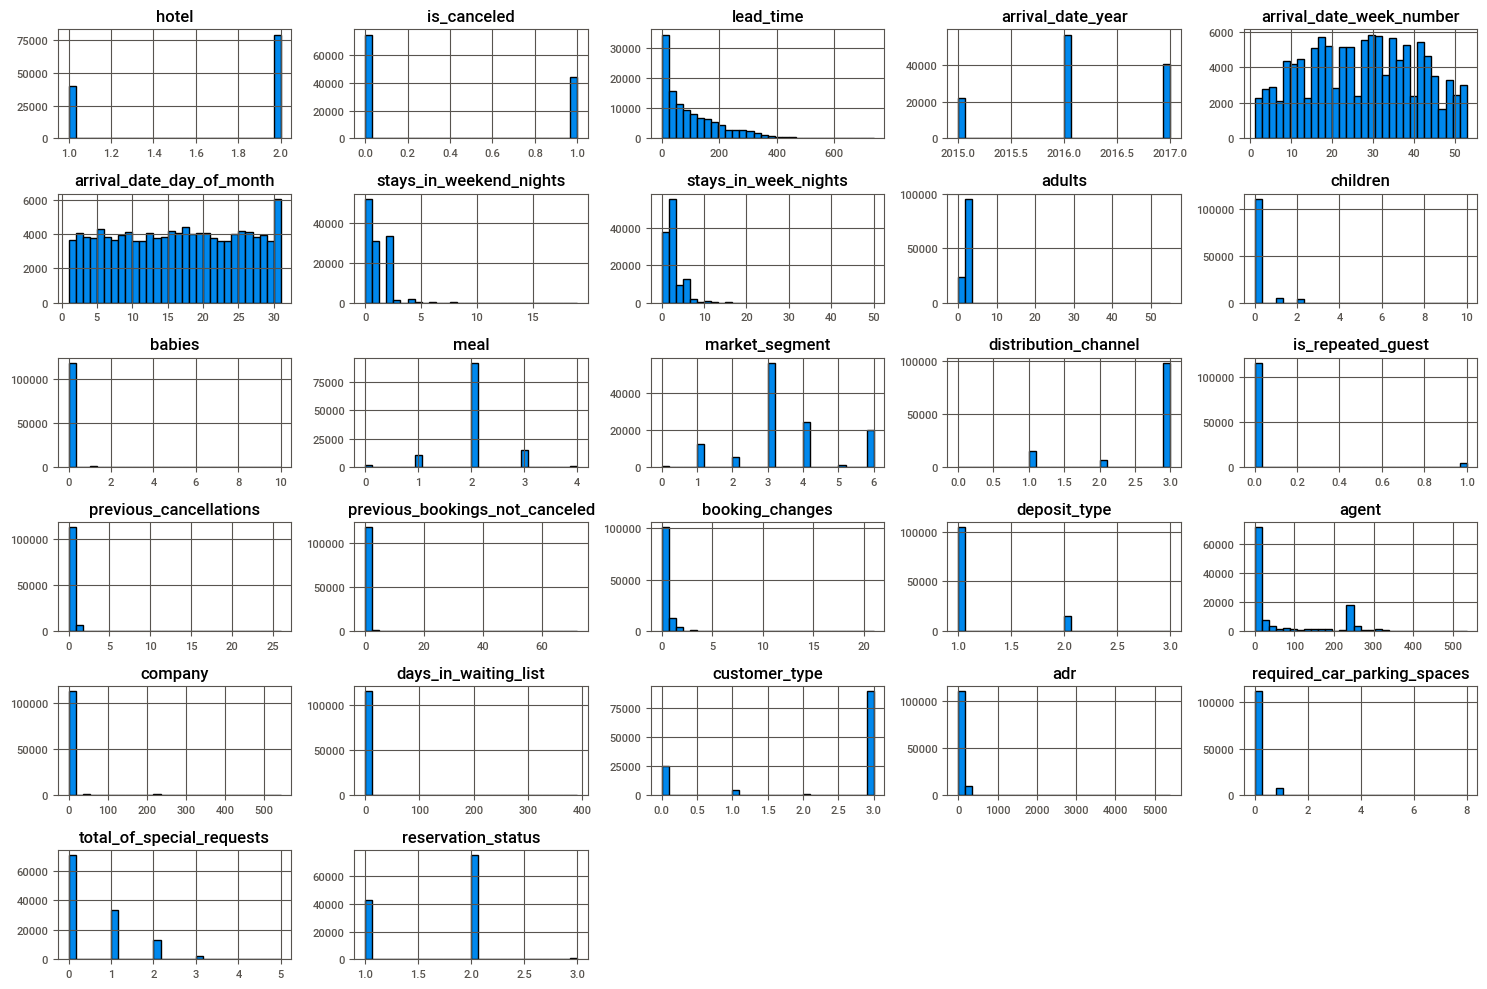

<Figure size 1500x1000 with 0 Axes>

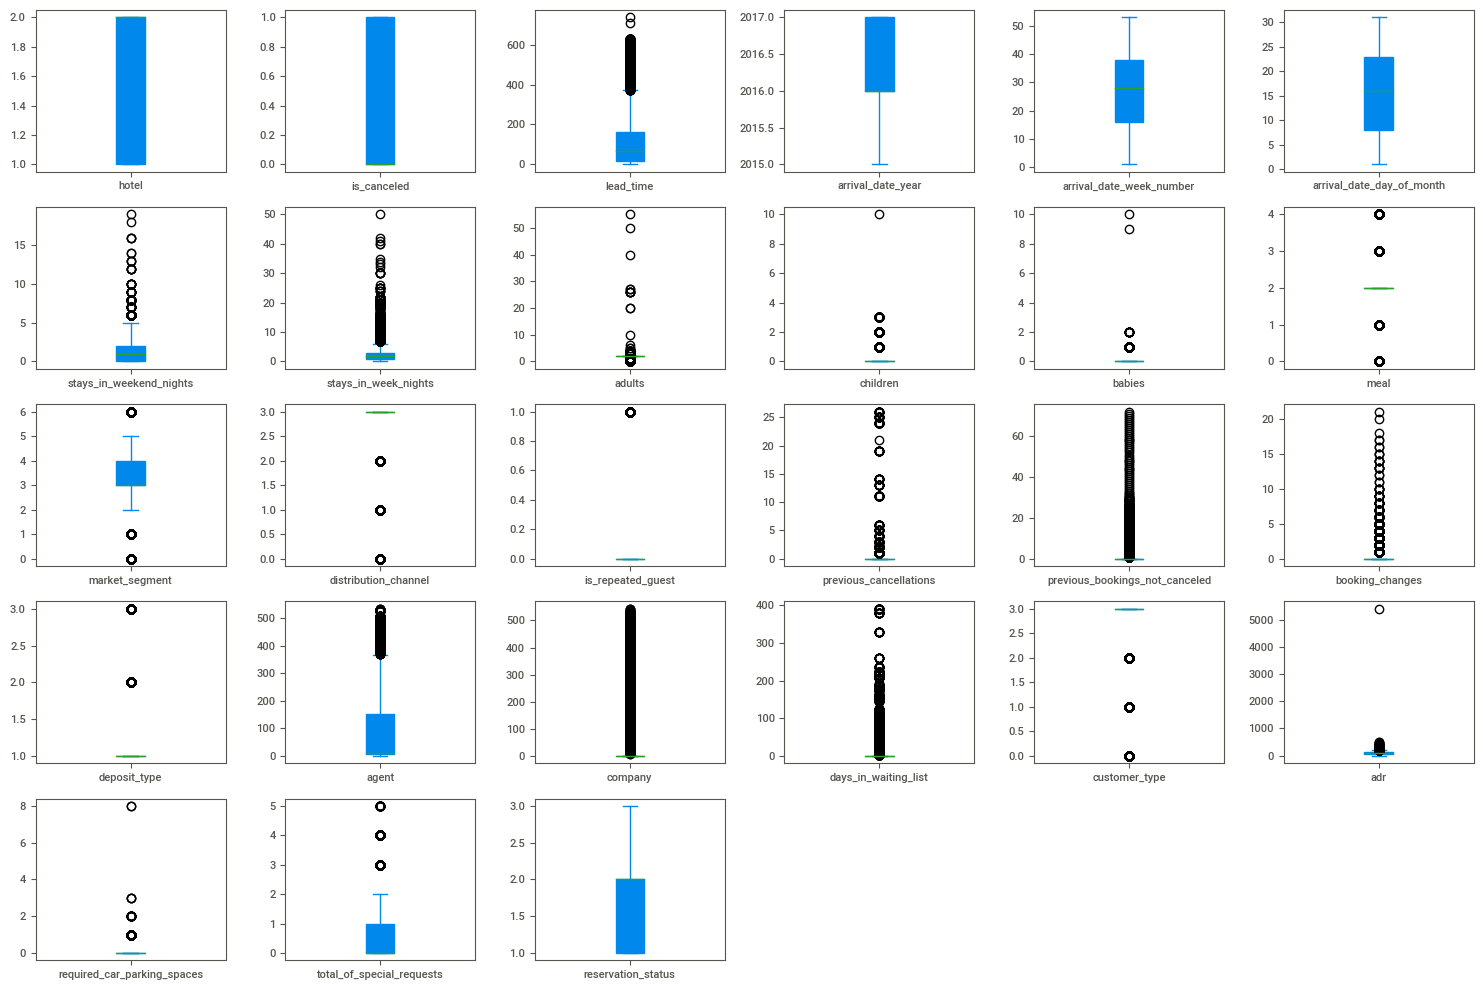

In [165]:
# Histograms
df[numerical_columns].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
df[numerical_columns].plot(kind='box', subplots=True, layout=(5, 6), figsize=(15, 10), patch_artist=True)
plt.tight_layout()
plt.show()

In [166]:

value_counts_dict = {}

for col in df.columns:
    counts = df[col].value_counts().reset_index()
    counts.columns = ['Value', 'Count']
    value_counts_dict[col] = counts

for col, counts_df in value_counts_dict.items():
    print(f"Value Counts for Column: {col}")
    print(counts_df)
    print("\n")




Value Counts for Column: hotel
   Value  Count
0      2  79330
1      1  40060


Value Counts for Column: is_canceled
   Value  Count
0      0  75166
1      1  44224


Value Counts for Column: lead_time
     Value  Count
0        0   6345
1        1   3460
2        2   2069
3        3   1816
4        4   1715
..     ...    ...
474    400      1
475    370      1
476    532      1
477    371      1
478    463      1

[479 rows x 2 columns]


Value Counts for Column: arrival_date_year
   Value  Count
0   2016  56707
1   2017  40687
2   2015  21996


Value Counts for Column: arrival_date_month
        Value  Count
0      August  13877
1        July  12661
2         May  11791
3     October  11160
4       April  11089
5        June  10939
6   September  10508
7       March   9794
8    February   8068
9    November   6794
10   December   6780
11    January   5929


Value Counts for Column: arrival_date_week_number
    Value  Count
0      33   3580
1      30   3087
2      32   3045
3      34



   **Value**    **Count** **for Column: is_canceled**

    0   =       75166

    1   =    44224

In the arrival_date_month values, which are categorical, I utilize an encoding dictionary for the months in the data.

In [167]:
# Define encoding dictionary for months
month_enc = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Apply the encoding using the dictionary
df['arrival_date_month'] = df['arrival_date_month'].map(month_enc)


In [168]:
# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()


In [169]:
df

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           1            0        342               2015                   7   
1           1            0        737               2015                   7   
2           1            0          7               2015                   7   
3           1            0         13               2015                   7   
4           1            0         14               2015                   7   
...       ...          ...        ...                ...                 ...   
119385      2            0         23               2017                   8   
119386      2            0        102               2017                   8   
119387      2            0         34               2017                   8   
119388      2            0        109               2017                   8   
119389      2            0        205               2017                   8   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                             0                     0       2  ...   
1                             0                     0       2  ...   
2                             0                     1       1  ...   
3                             0                     1       1  ...   
4                             0                     2       2  ...   
...                         ...                   ...     ...  ...   
119385                        2                     5       2  ...   
119386                        2                     5       3  ...   
119387                        2                     5       2  ...   
119388                        2                     5       2  ...   
119389                        2                     7       2  ...   

        deposit_type  agent  company days_in_waiting_list  customer_type  \
0                  1    0.0      0.0                    0            3.0   
1                  1    0.0      0.0                    0            3.0   
2                  1    0.0      0.0                    0            3.0   
3                  1  304.0      0.0                    0            3.0   
4                  1  240.0      0.0                    0            3.0   
...              ...    ...      ...                  ...            ...   
119385             1  394.0      0.0                    0            3.0   
119386             1    9.0      0.0                    0            3.0   
119387             1    9.0      0.0                    0            3.0   
119388             1   89.0      0.0                    0            3.0   
119389             1    9.0      0.0                    0            3.0   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0                          0   
1         0.00                            0                          0   
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
...        ...                          ...                        ...   
119385   96.14    

In [170]:
# Step 4: Handling Outliers

# Using IQR to detect outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))
print("Outliers per column:")
print(outliers.sum())  # Print the count of outliers per column

# Optionally, remove outliers
df_no_outliers = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


Outliers per column:
hotel                                 0
is_canceled                           0
lead_time                          3005
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights             265
stays_in_week_nights               3354
adults                            29710
children                           8590
babies                              917
meal                              27080
market_segment                    32656
distribution_channel              21520
is_repeated_guest                  3810
previous_cancellations             6484
previous_bookings_not_canceled     3620
booking_changes                   18076
deposit_type                      14749
agent                              1254
company                            6797
days_in_waiting_list               3698
customer_type                     29777
adr                

In [171]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [172]:
# Convert 0 values to NaN
df['country'] = df['country'].replace(0, np.nan)

# Now fill NaN values with the desired value
df['country'] = df['country'].fillna("Unknown")


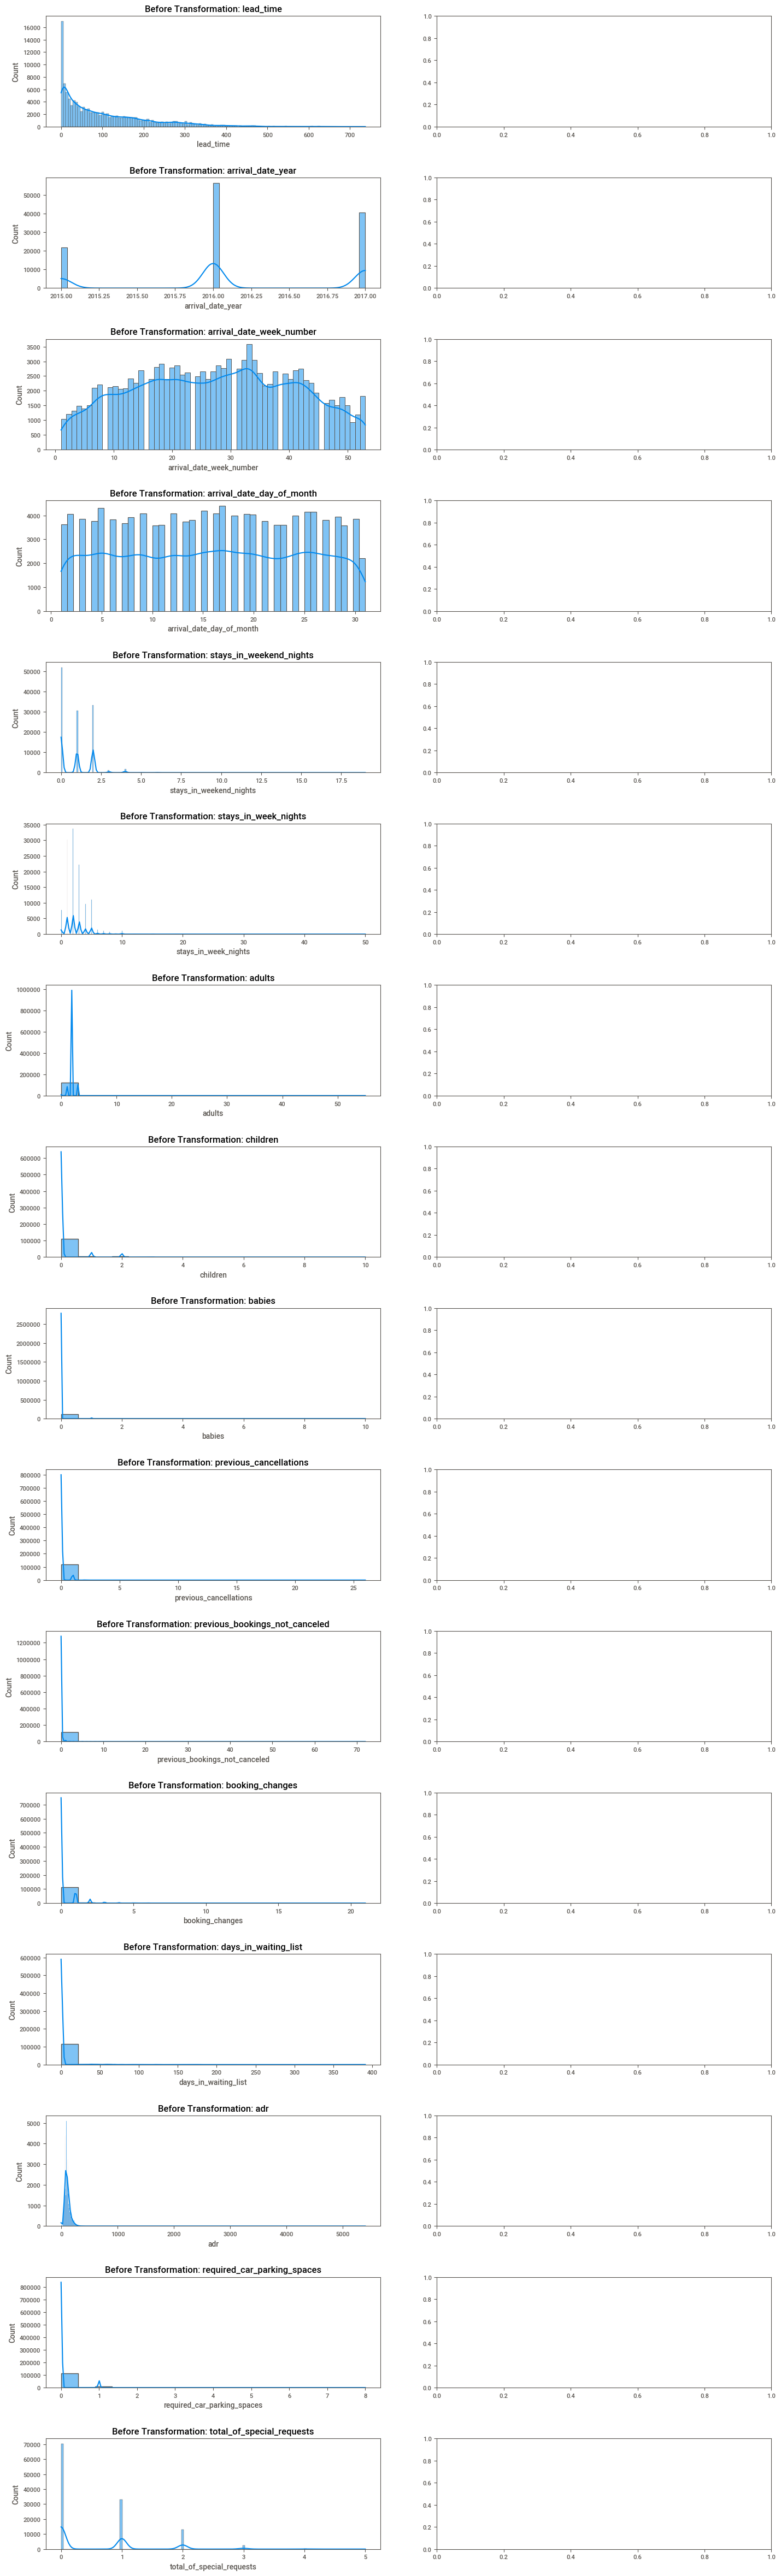

In [173]:

# Numerical columns to transform
numerical_columns = ['lead_time', 'arrival_date_year', 'arrival_date_week_number',
                     'arrival_date_day_of_month', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'adults', 'children', 'babies',
                     'previous_cancellations', 'previous_bookings_not_canceled',
                     'booking_changes', 'days_in_waiting_list', 'adr',
                     'required_car_parking_spaces', 'total_of_special_requests']

# Plot distributions before transformation
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 3*len(numerical_columns)))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Transformation: {col}')

plt.show()


In [174]:
# Apply quantile_transform to numerical columns
df[numerical_columns] = quantile_transform(df[numerical_columns], output_distribution='normal')


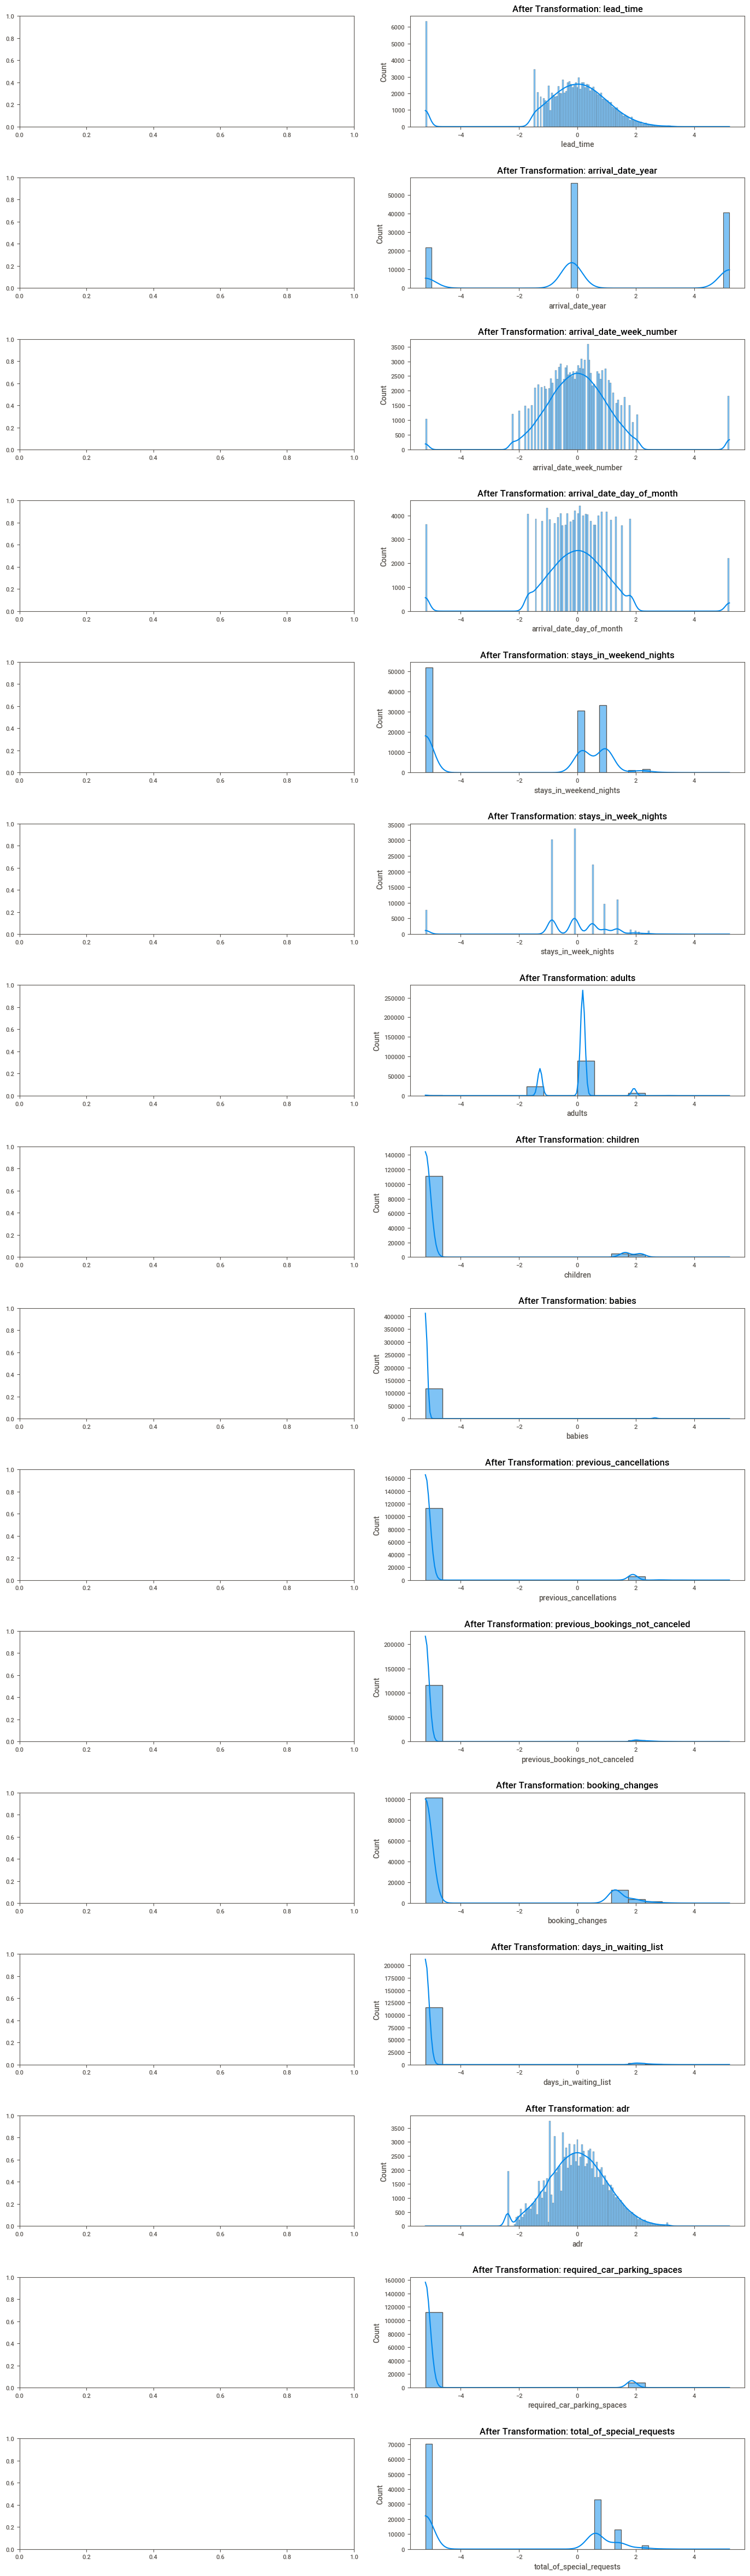

In [175]:
# Plot distributions after transformation
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 3*len(numerical_columns)))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'After Transformation: {col}')

plt.show()


In [176]:
pip install sweetviz

In [177]:
import sweetviz as sv

In [178]:
report = sv.analyze(df, target_feat="is_canceled")

                                             |          | [  0%]   00:00 -> (? left)


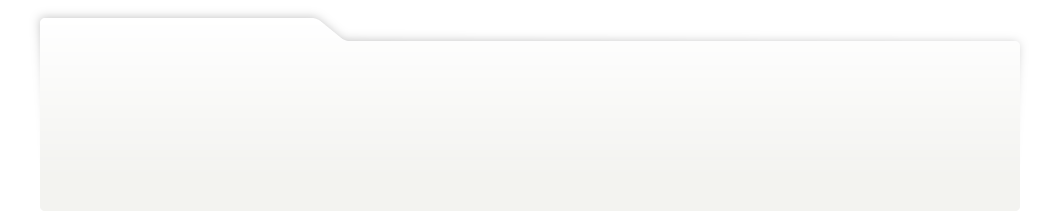
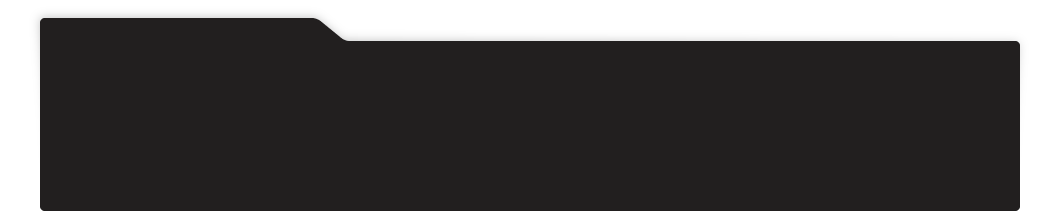
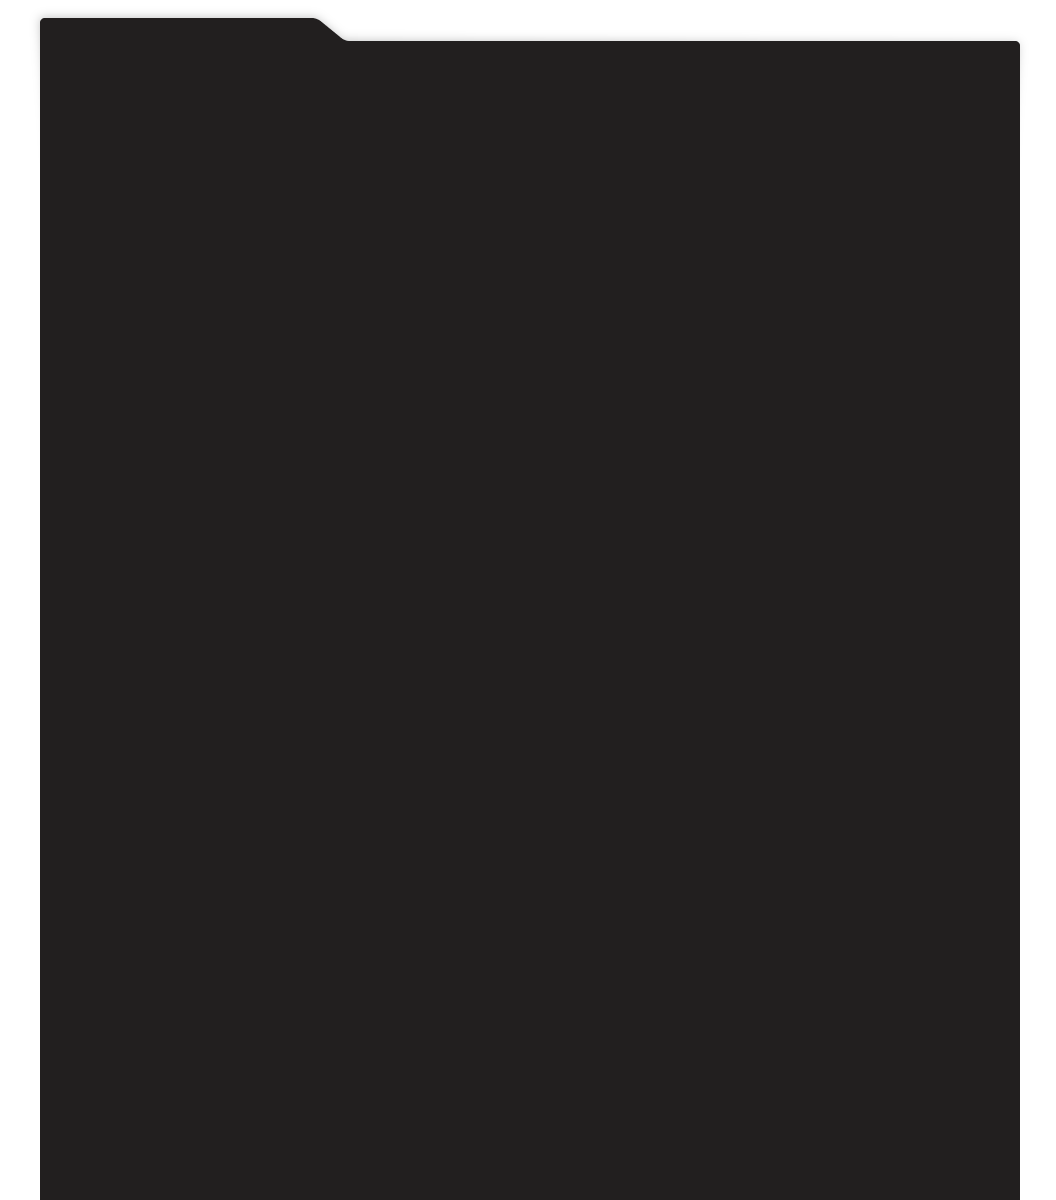
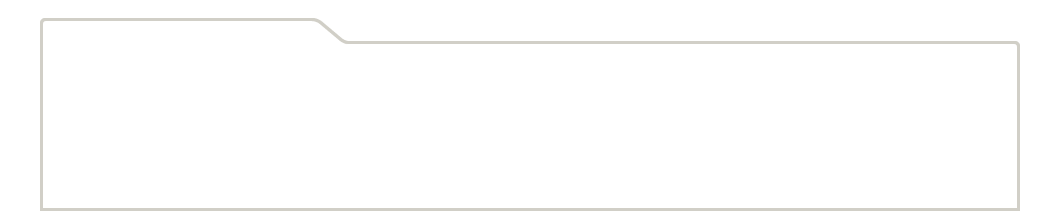
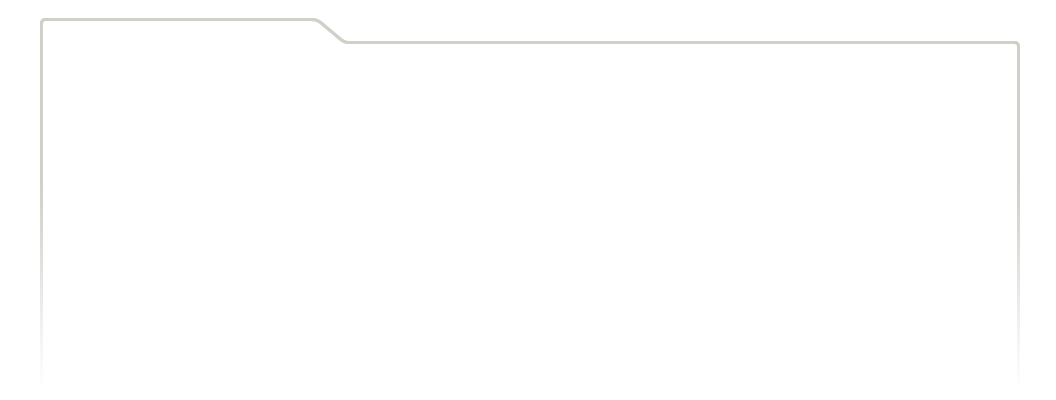
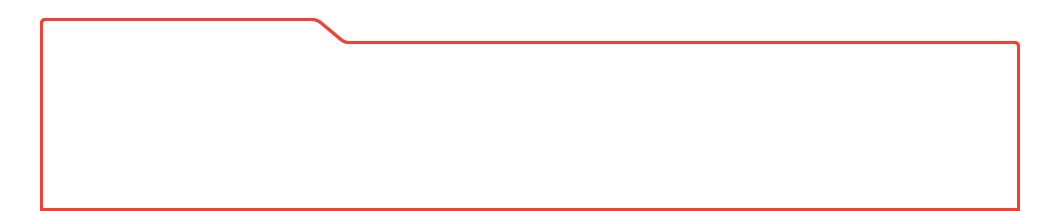
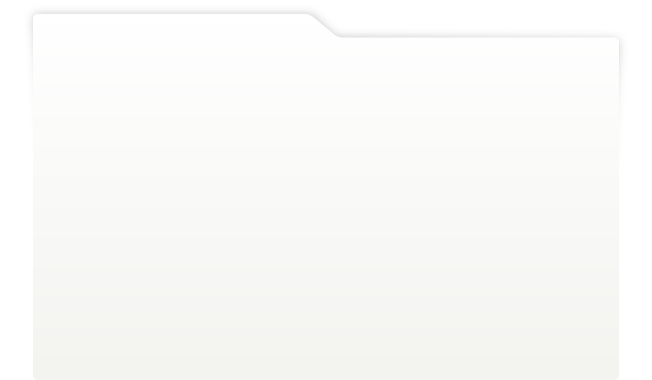
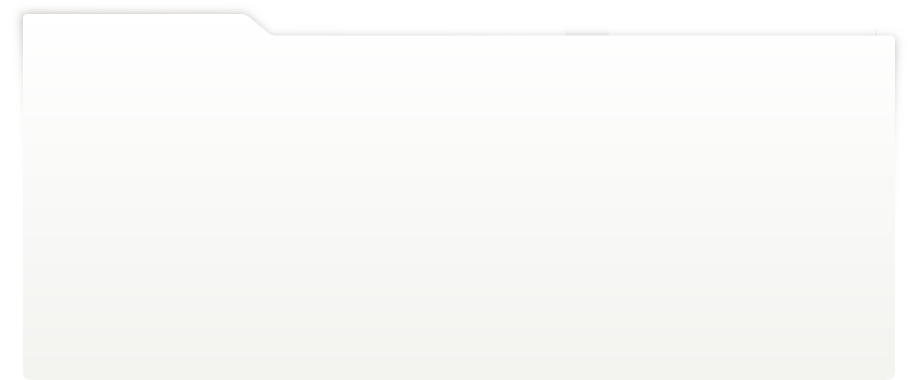
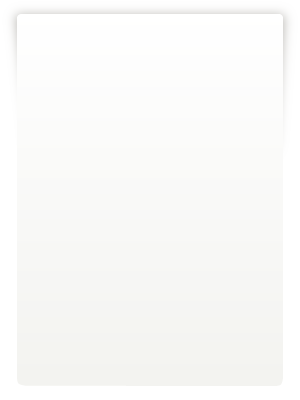
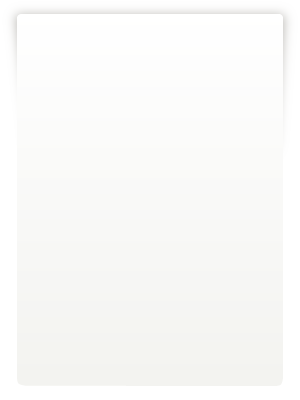
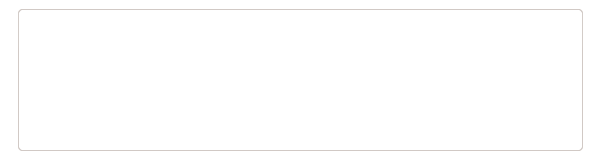
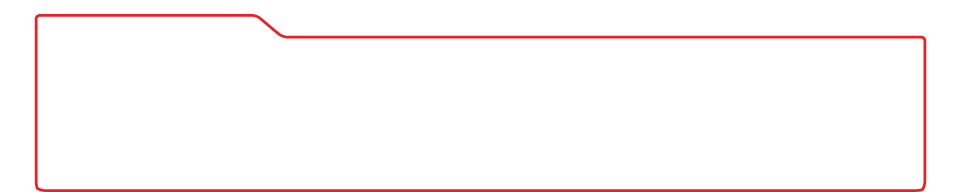
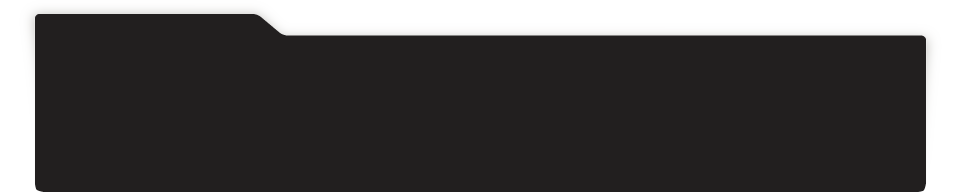
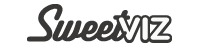
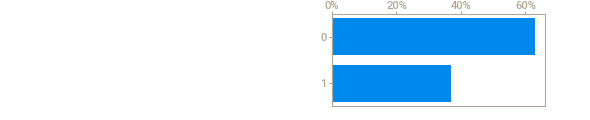
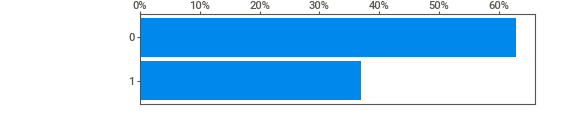
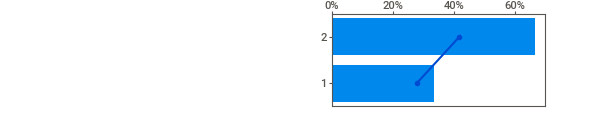
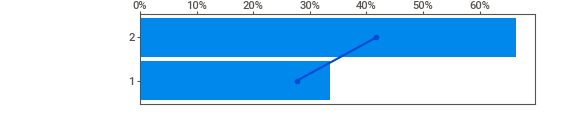
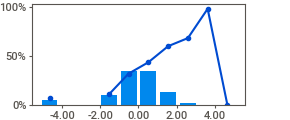
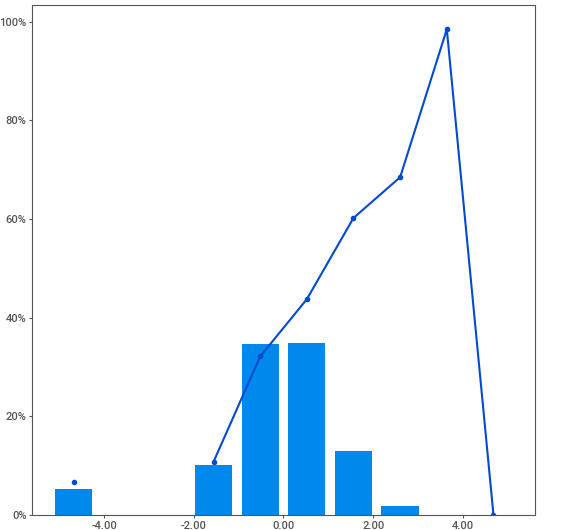
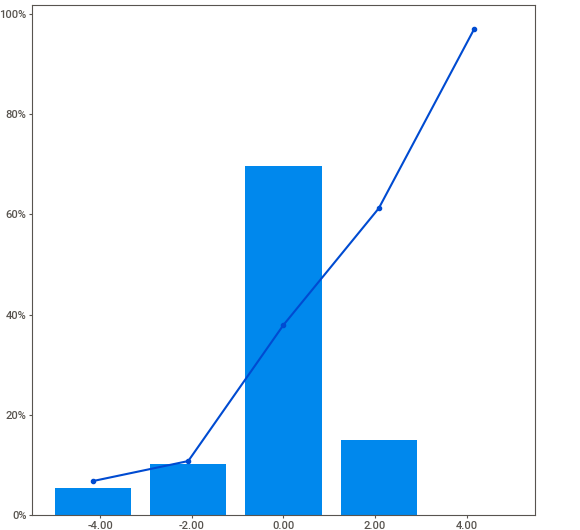
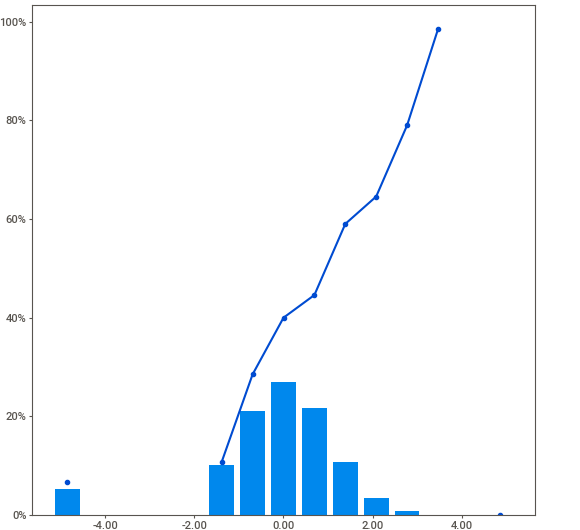
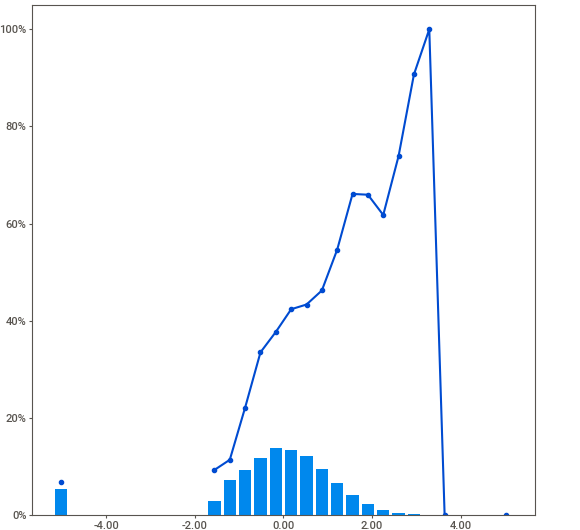
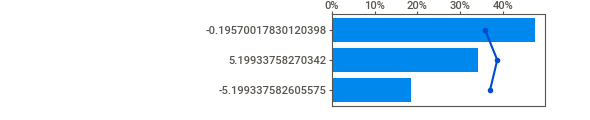
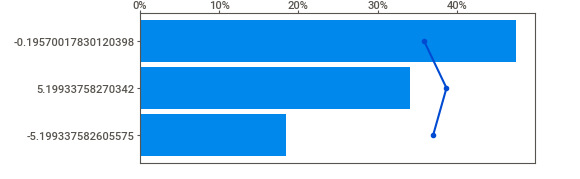
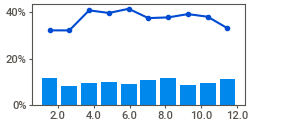
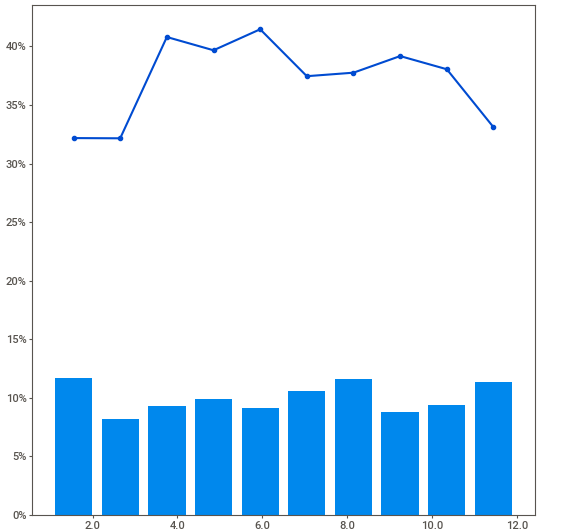
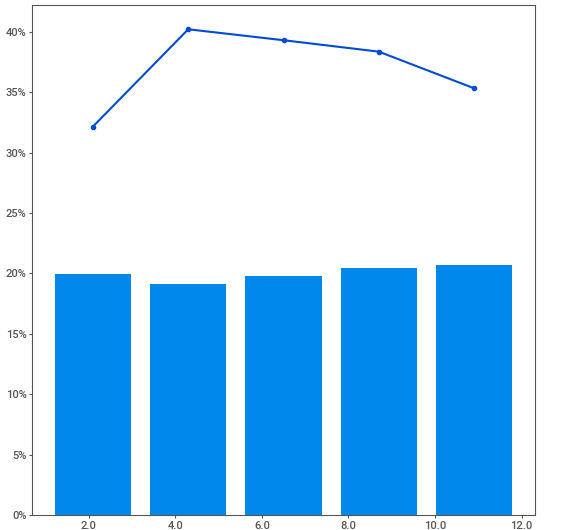
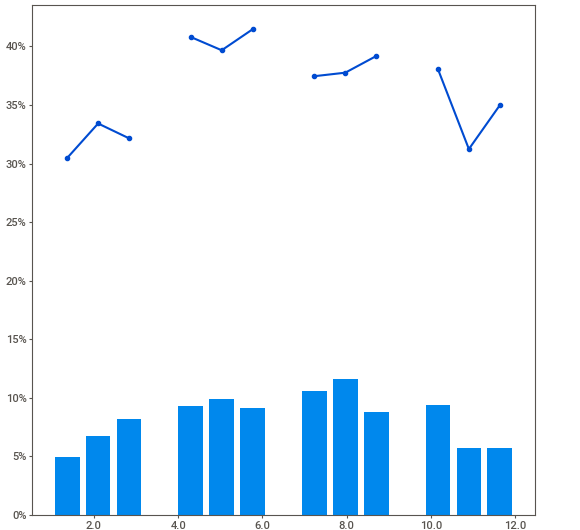
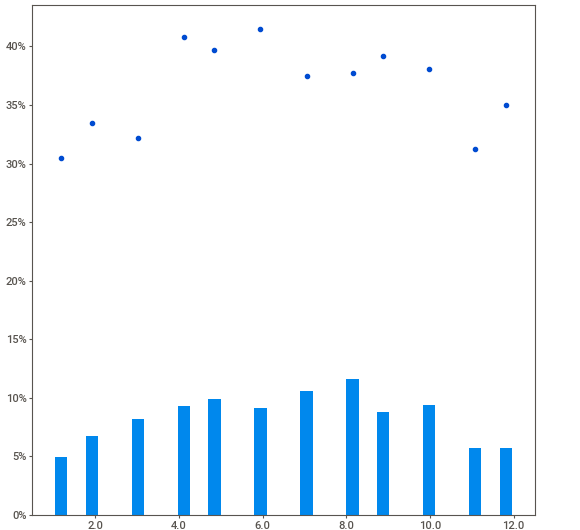
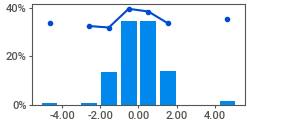
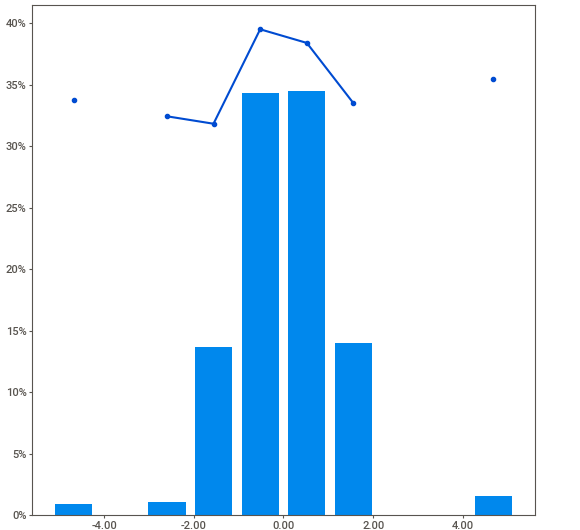
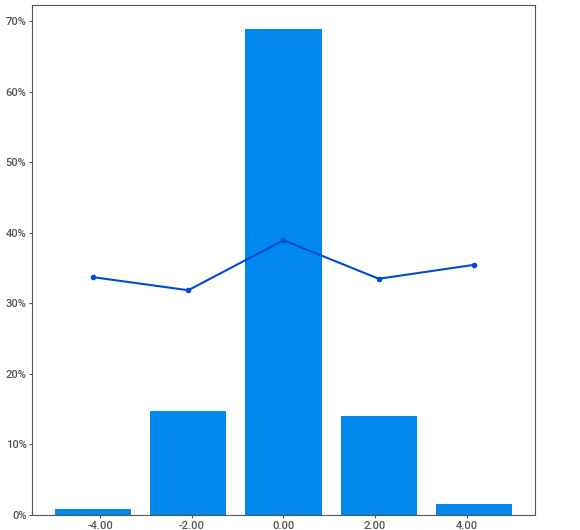
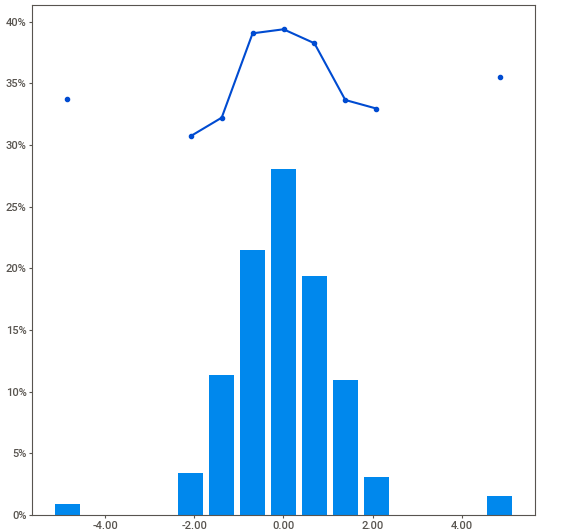
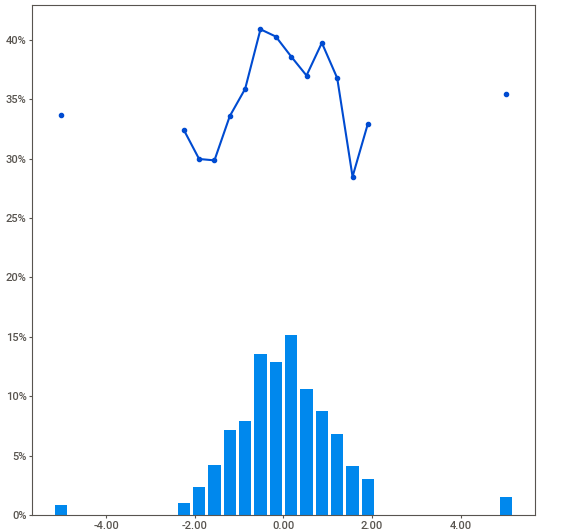
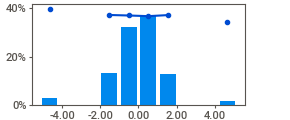
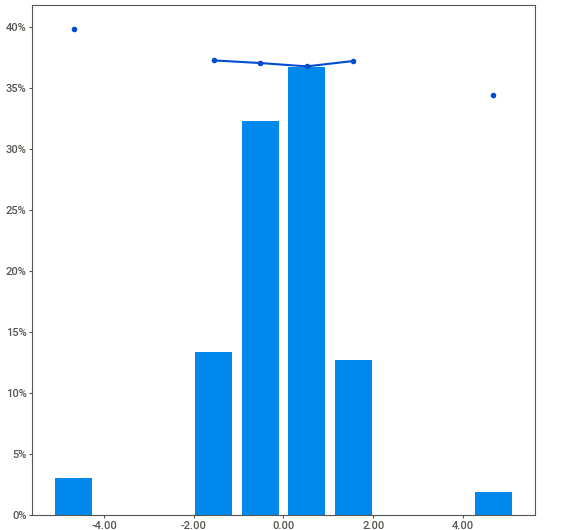
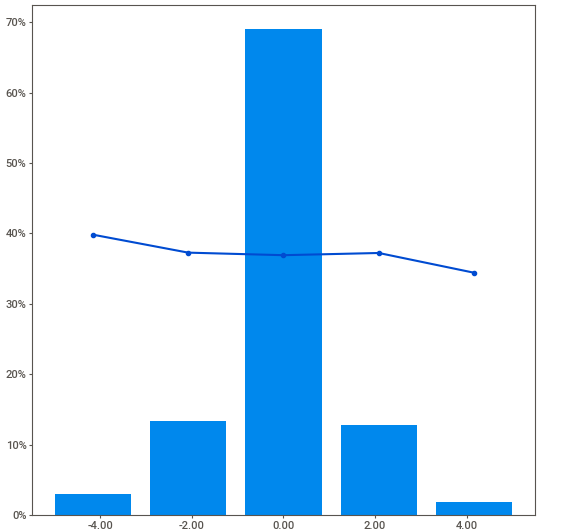
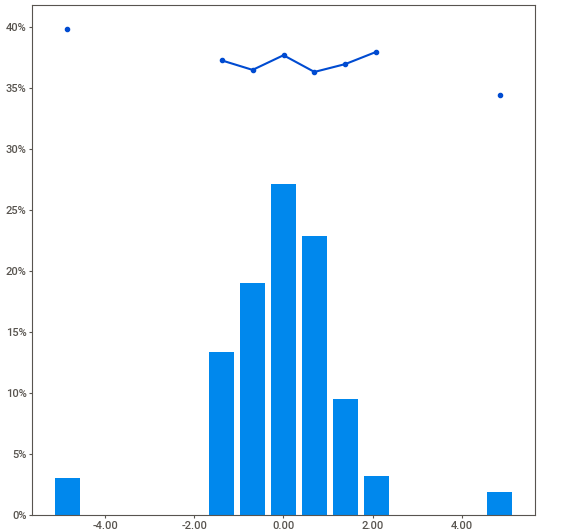
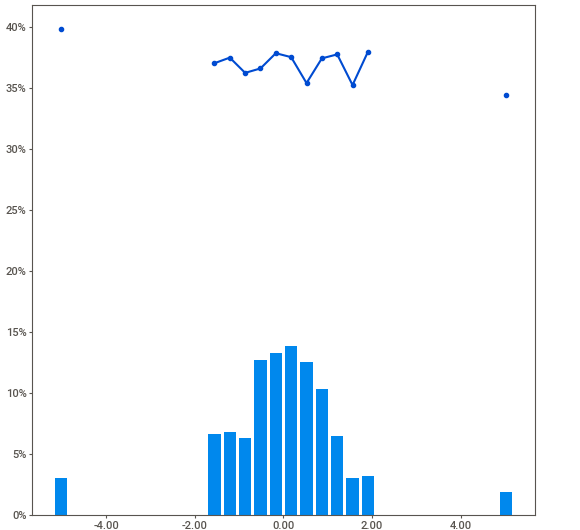
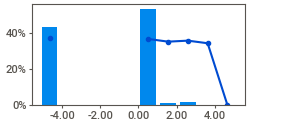
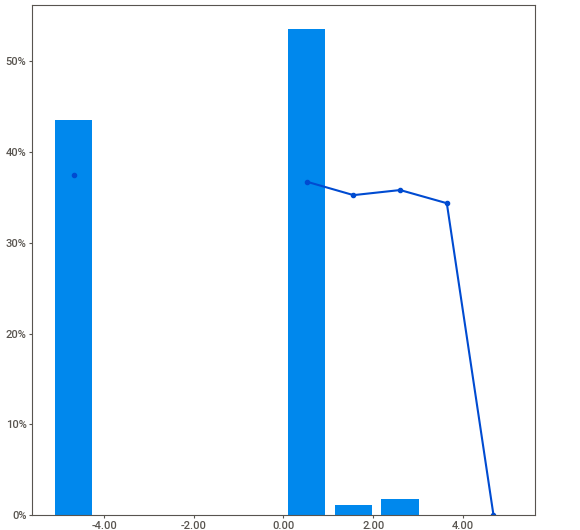
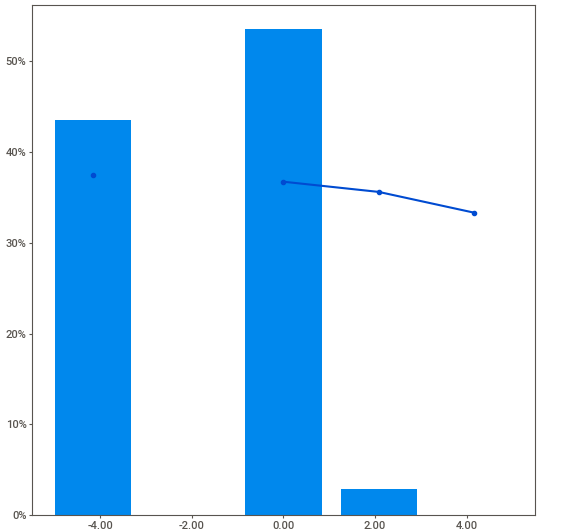
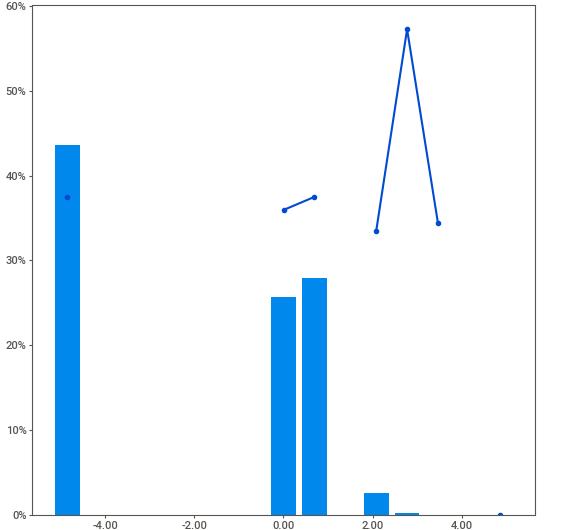
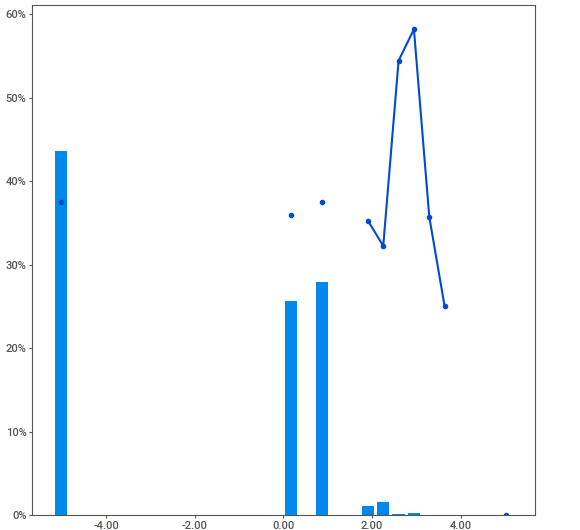
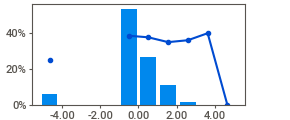
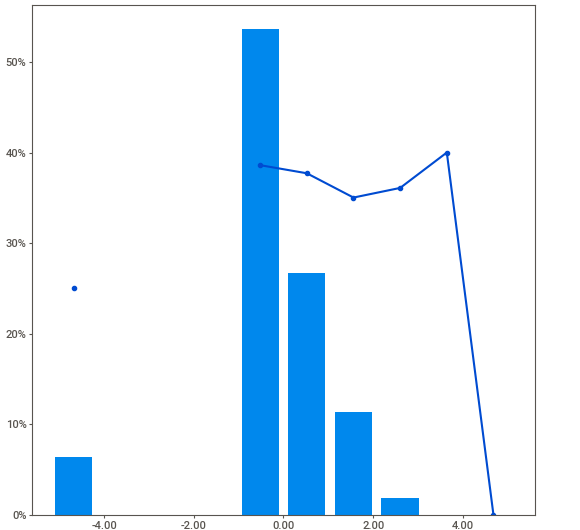
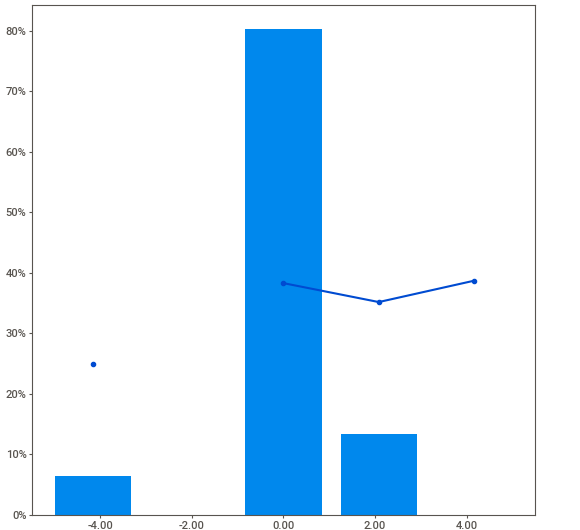
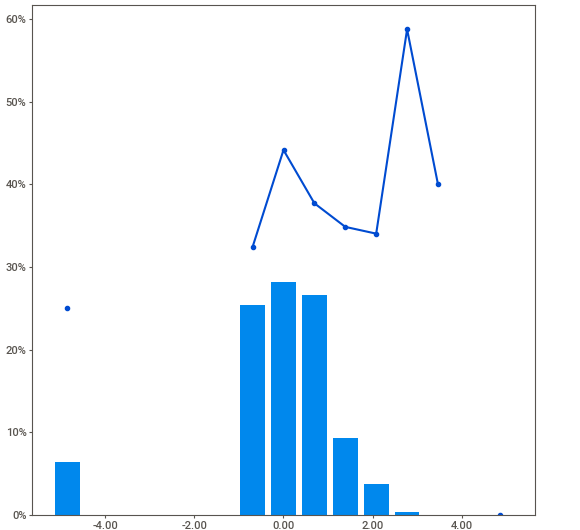
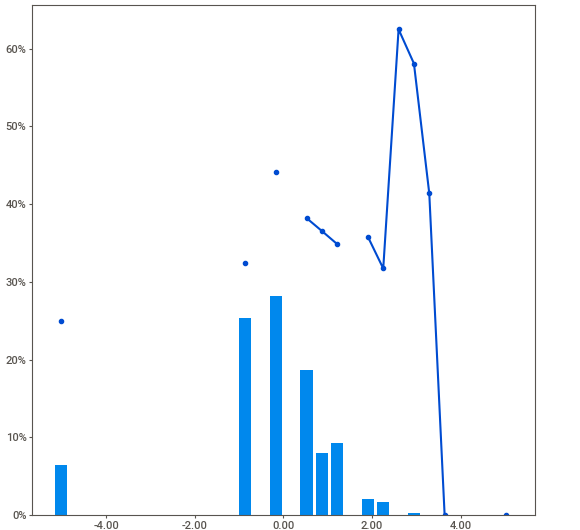
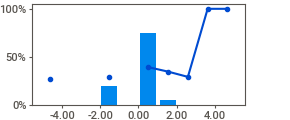
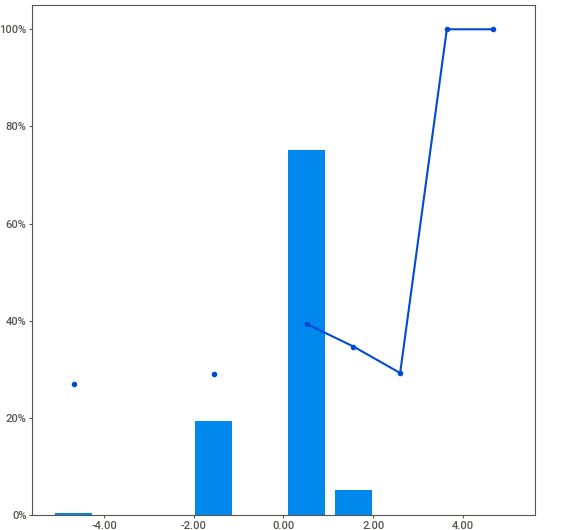
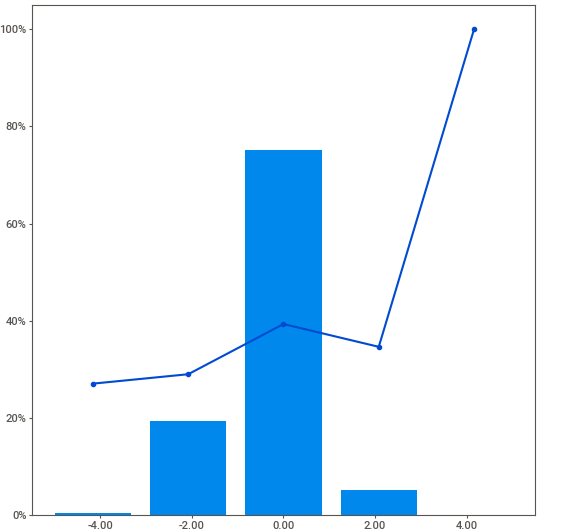
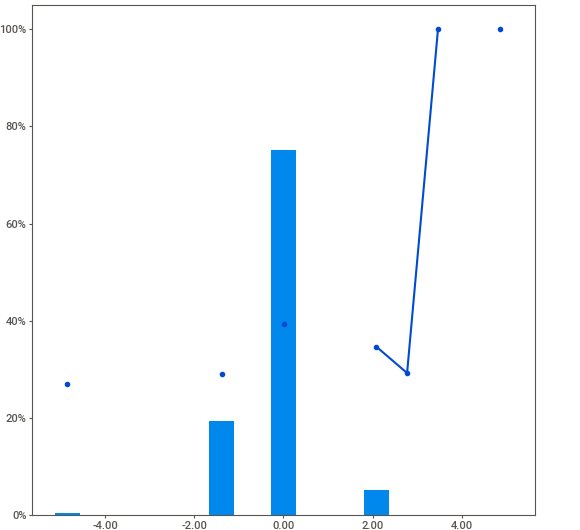
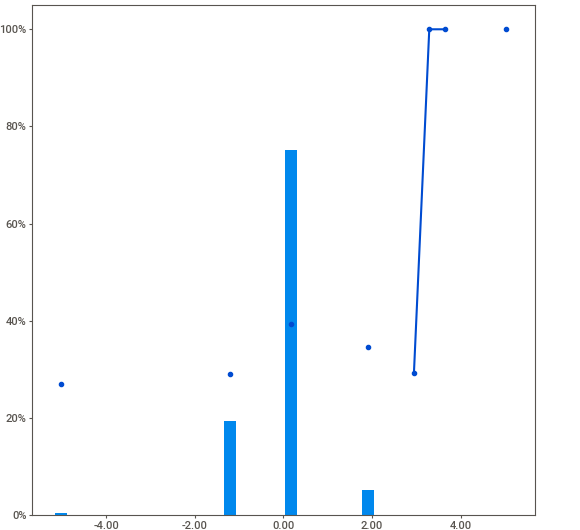
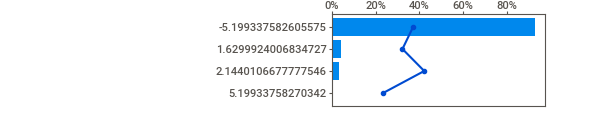
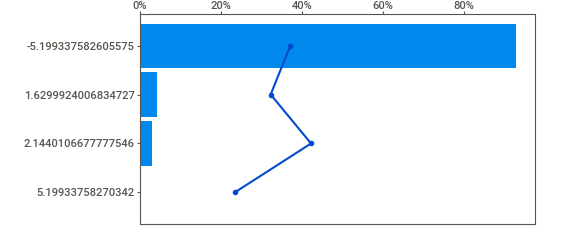
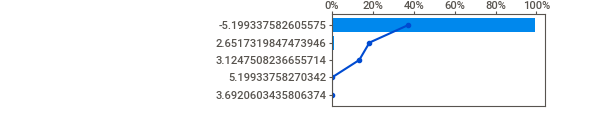
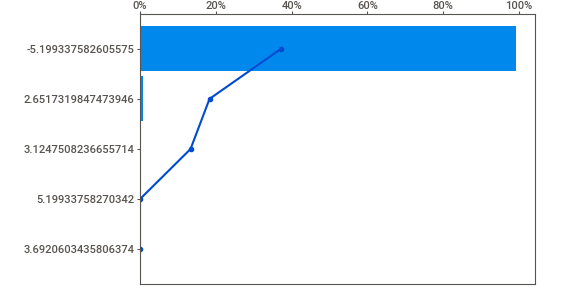
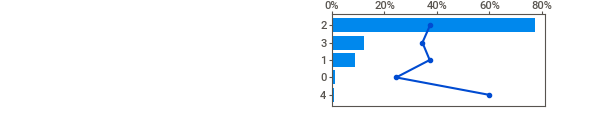
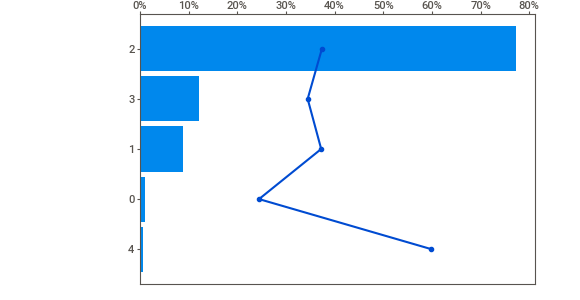
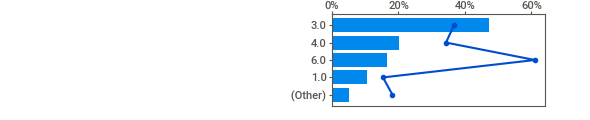
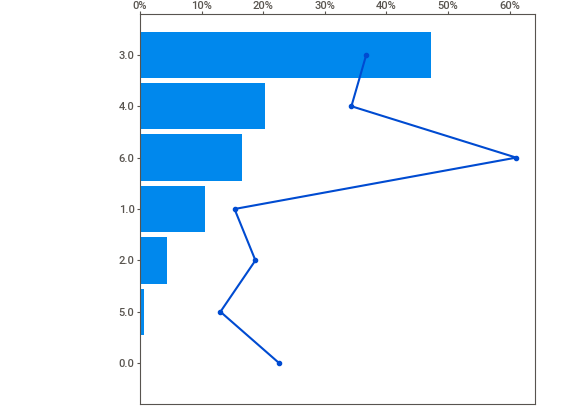
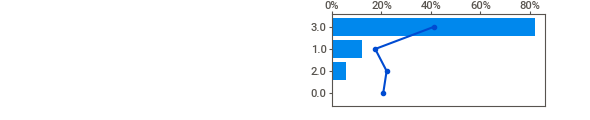
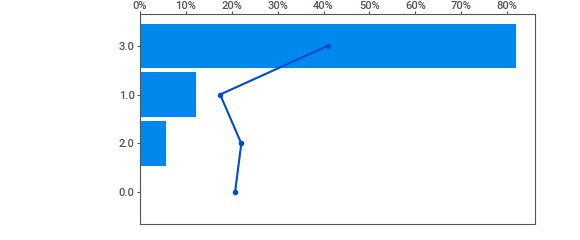
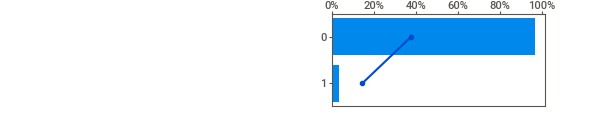
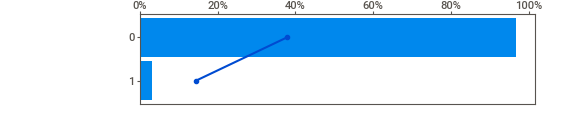
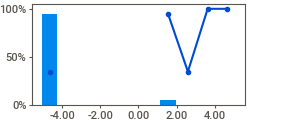
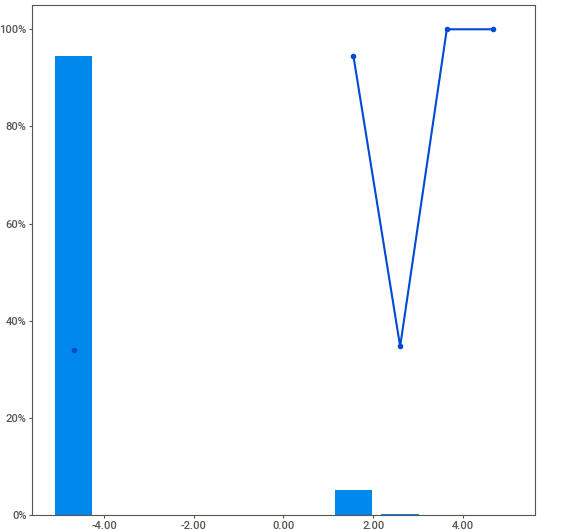
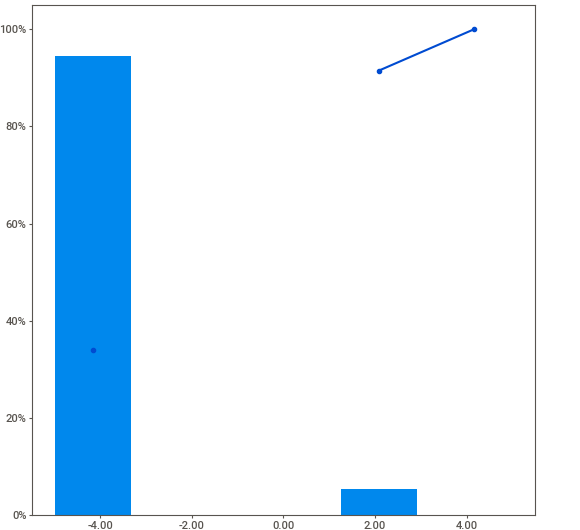
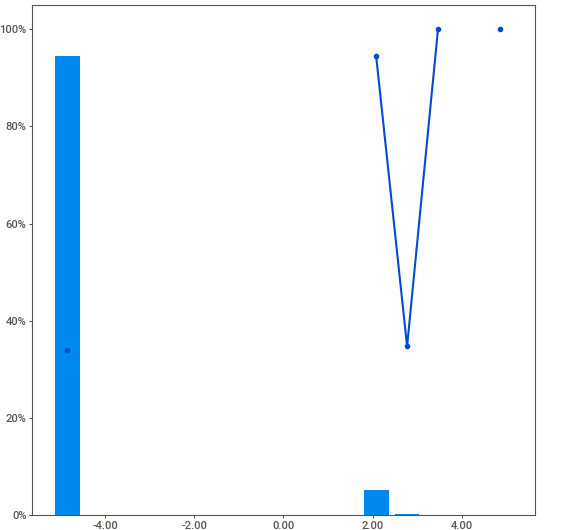
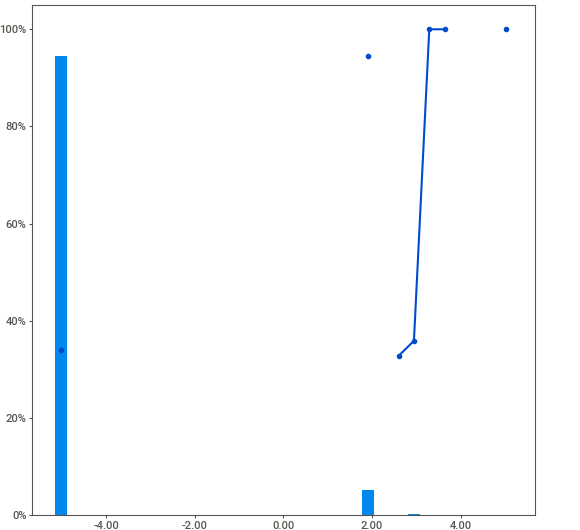
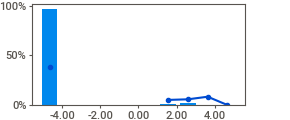
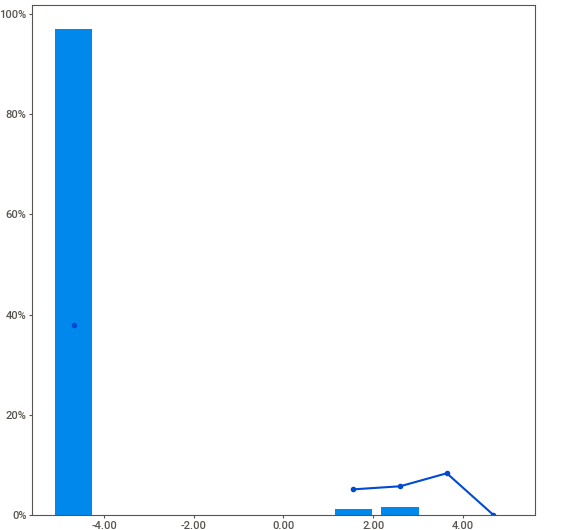
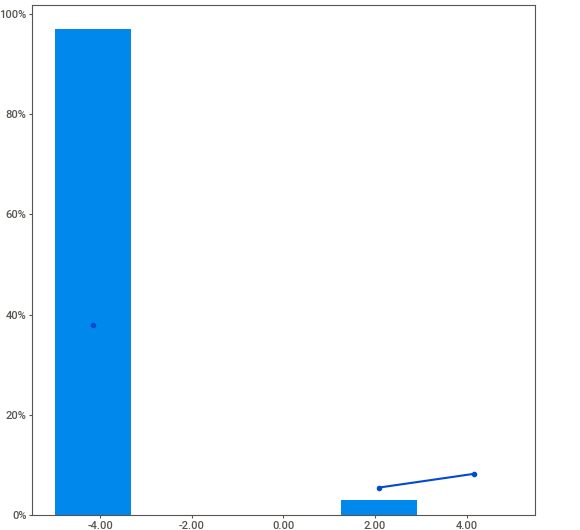
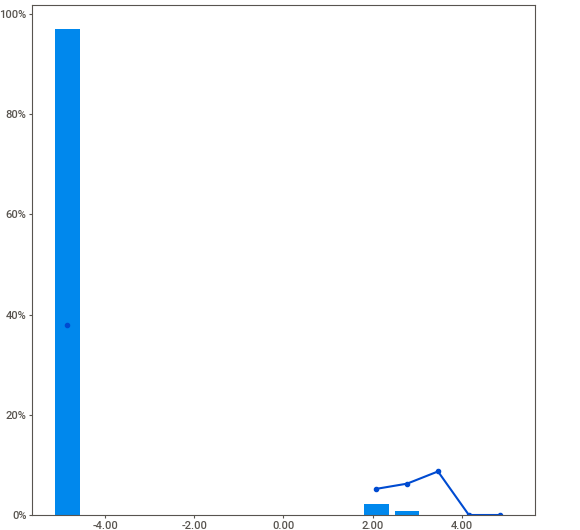
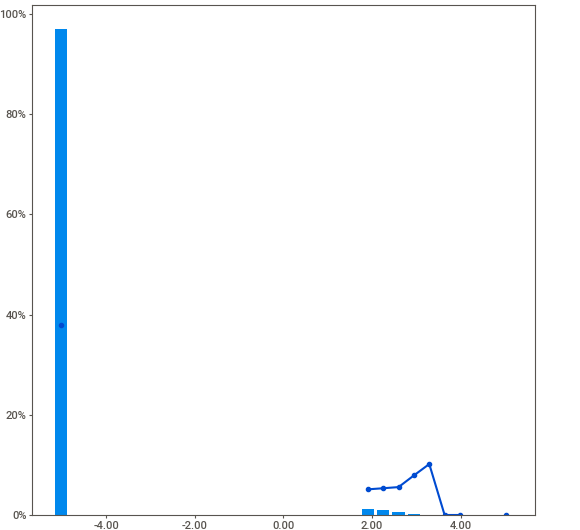
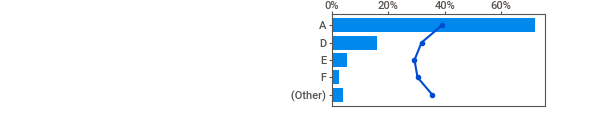
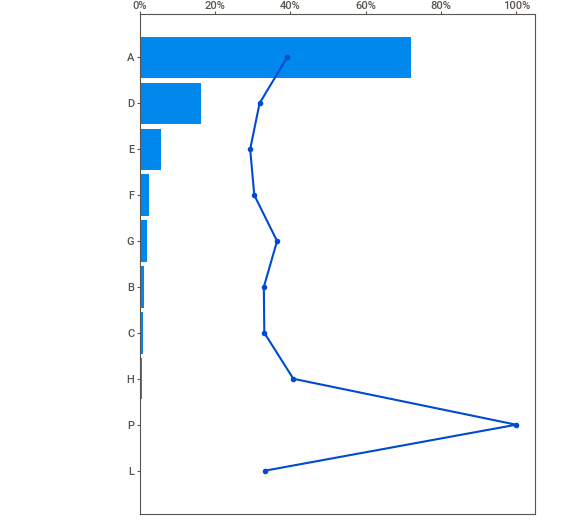
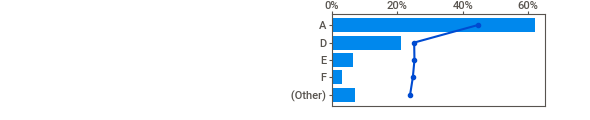
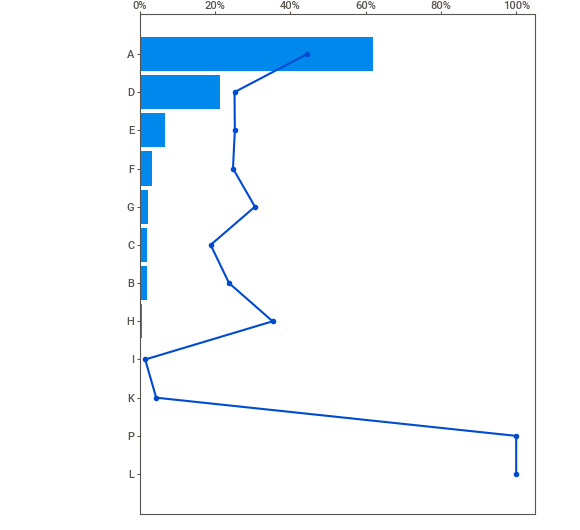
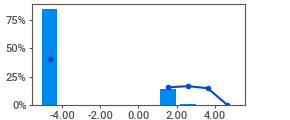
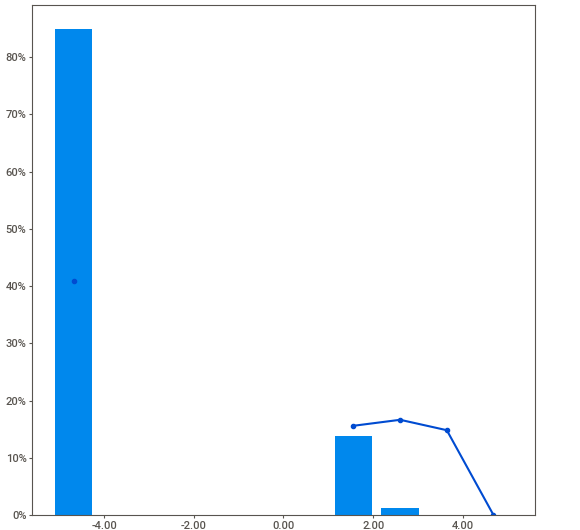
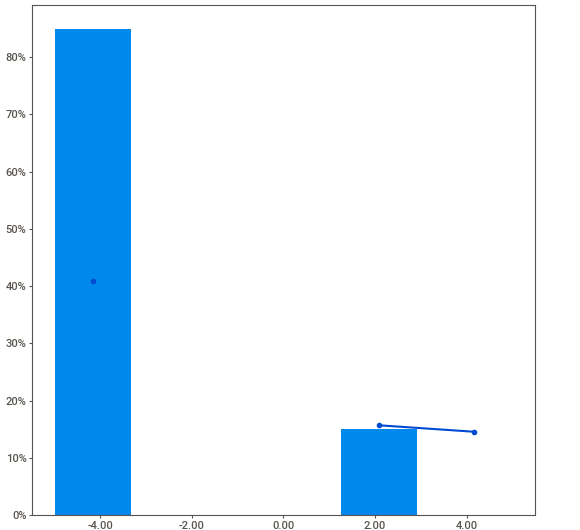
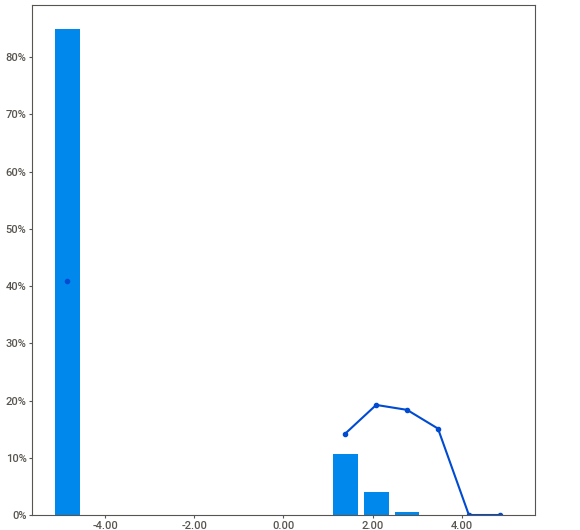
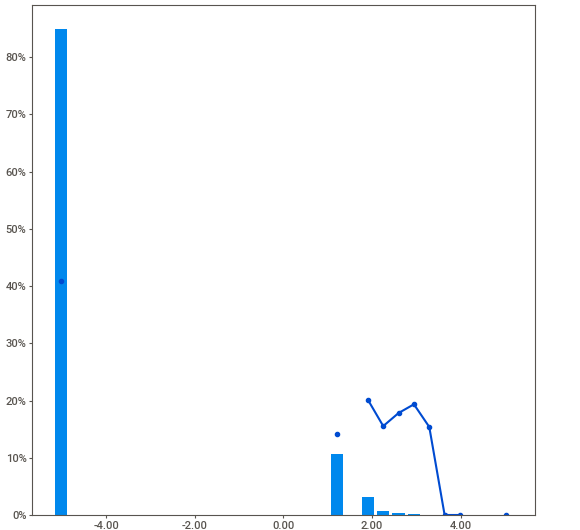
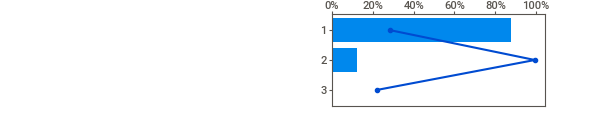
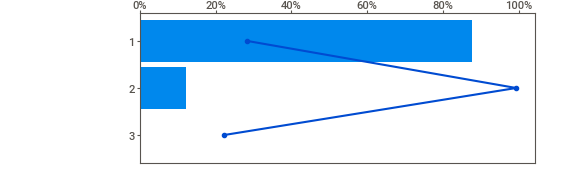
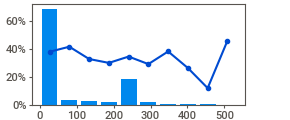
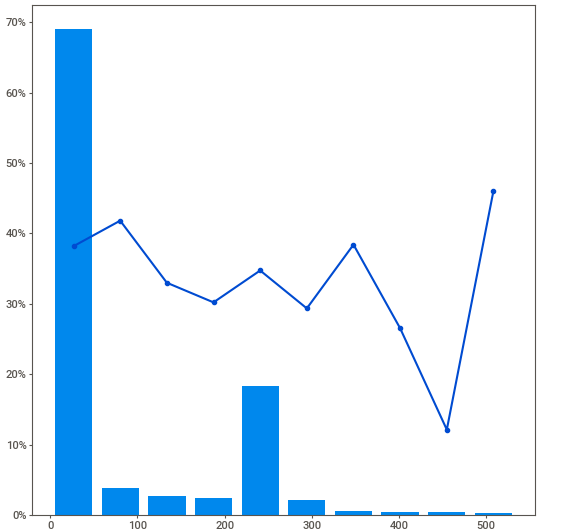
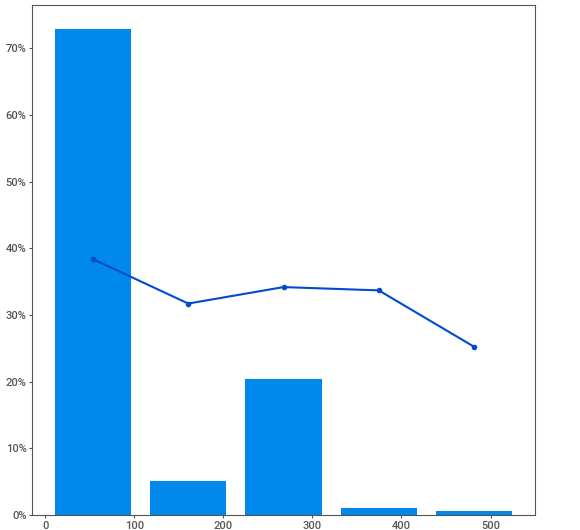
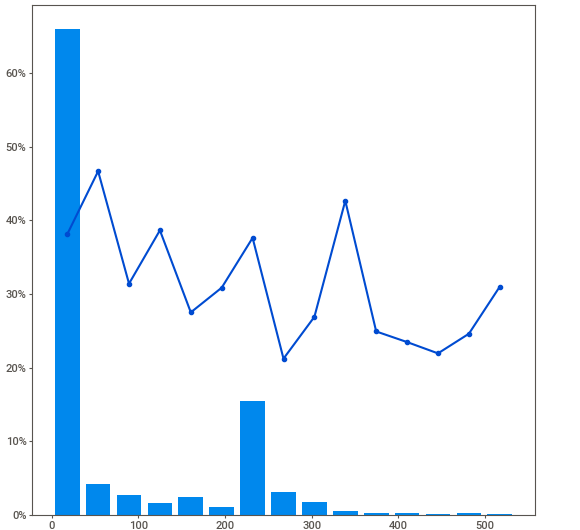
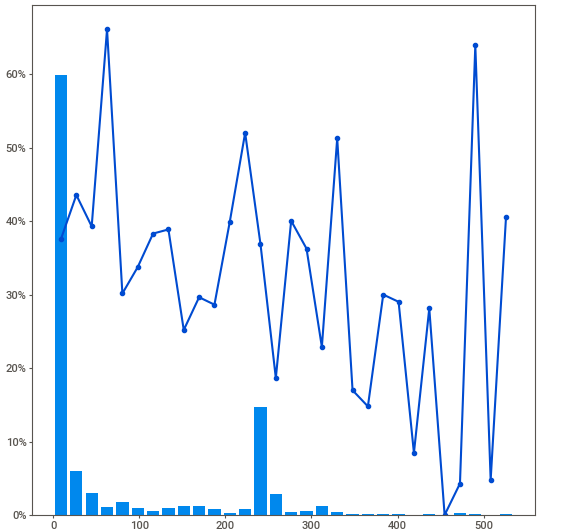
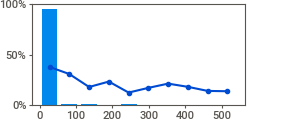
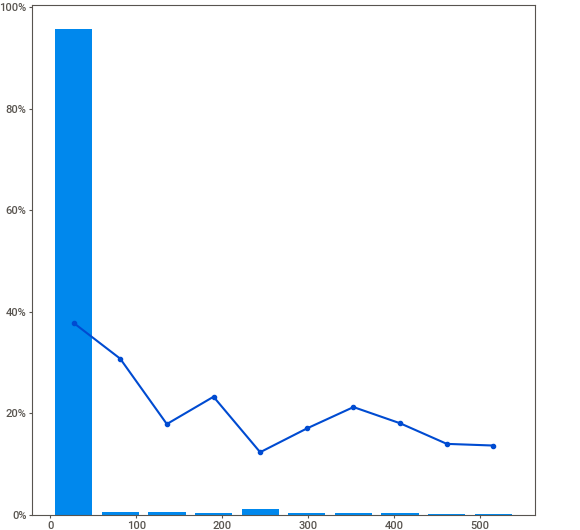
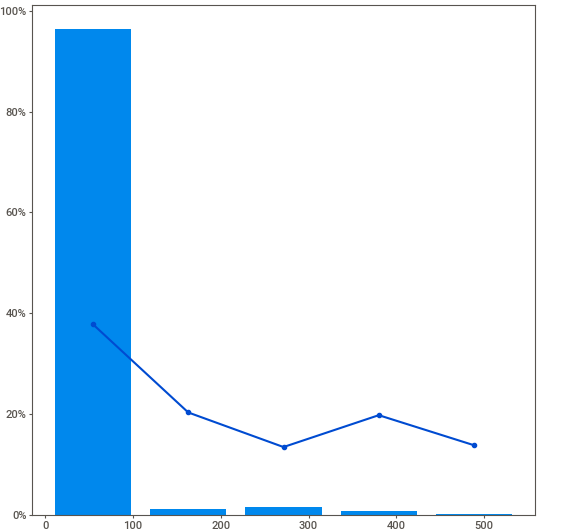
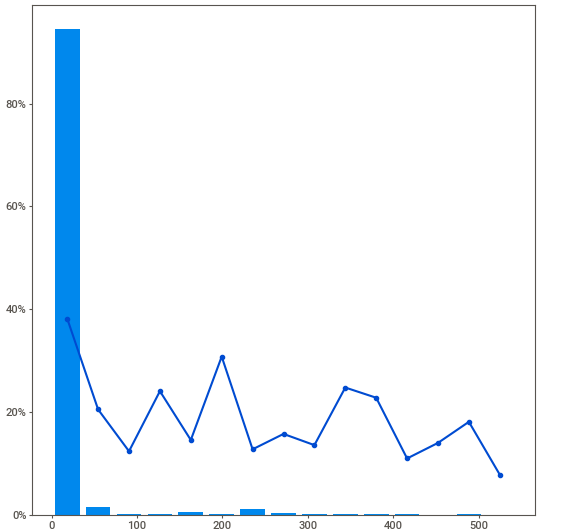
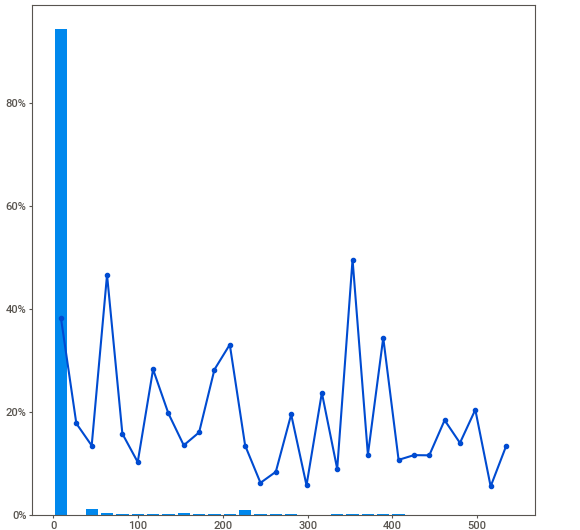
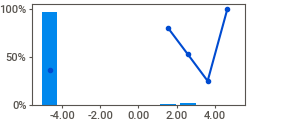
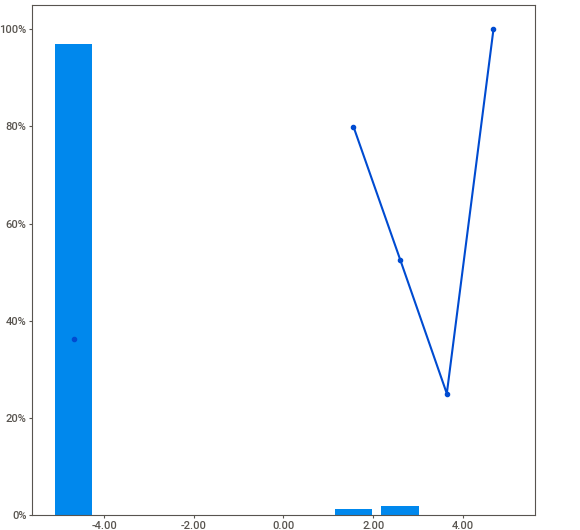
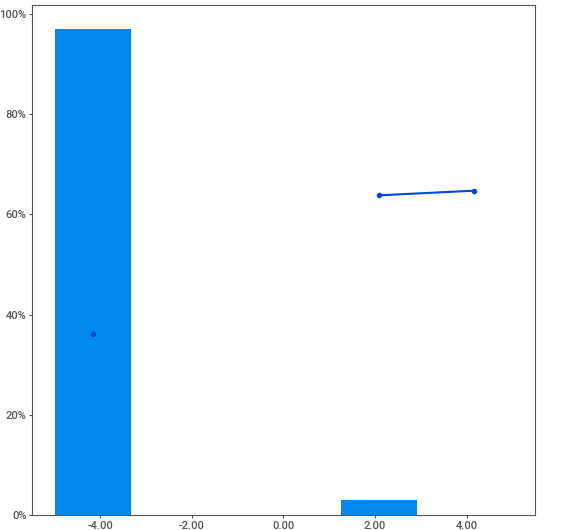
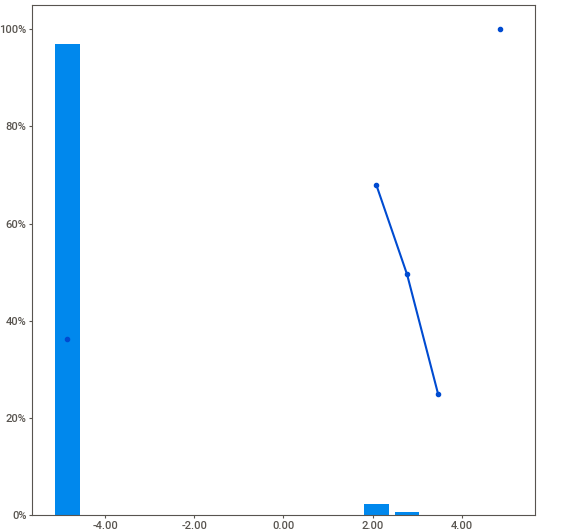
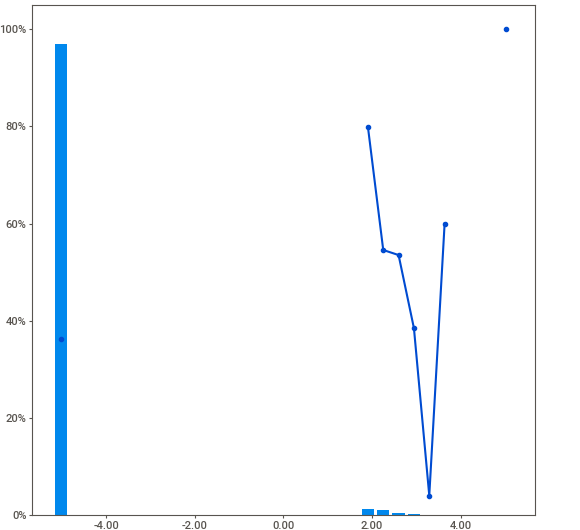
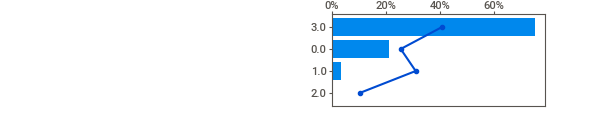
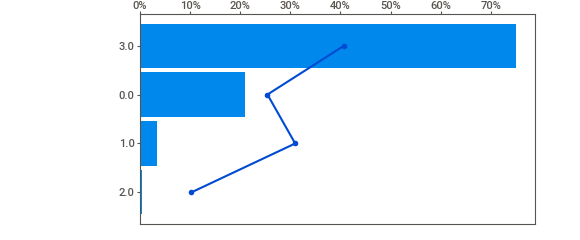
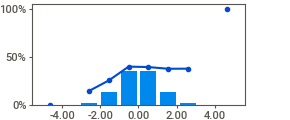
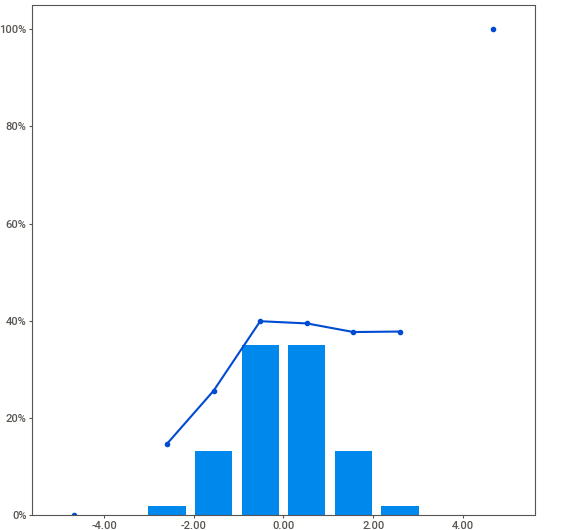
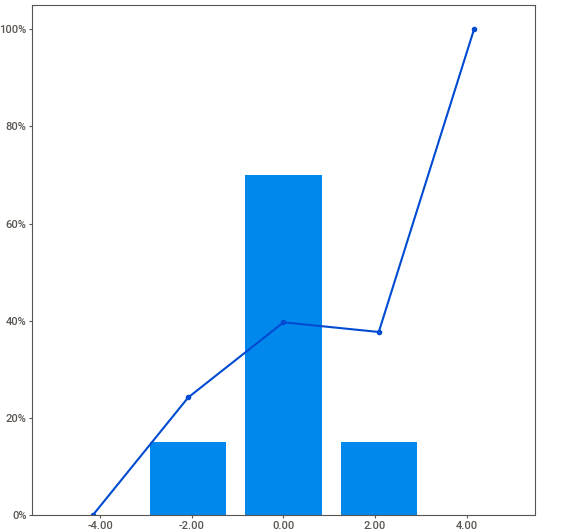
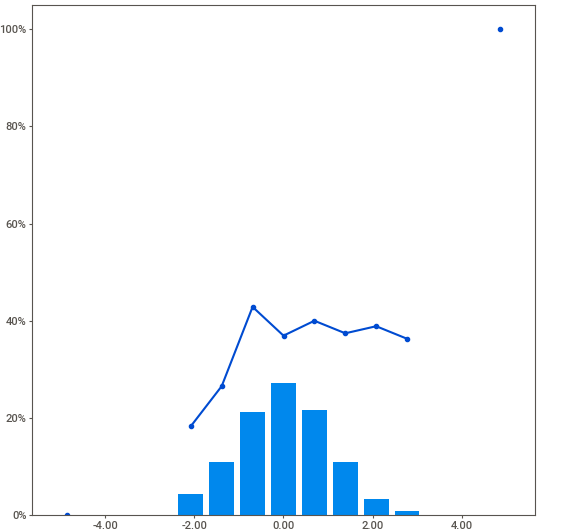
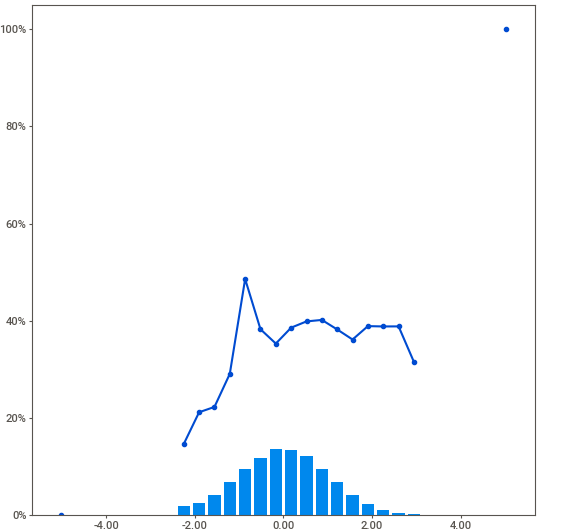
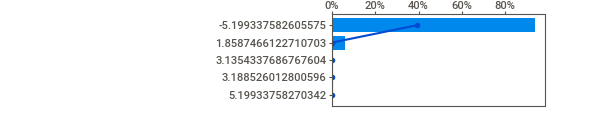
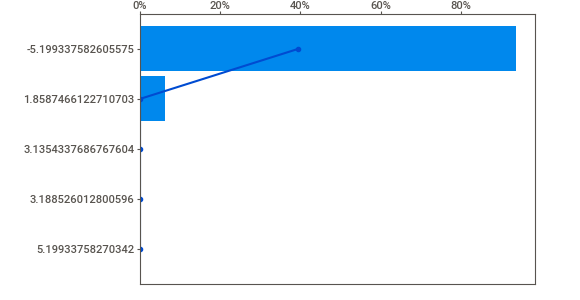
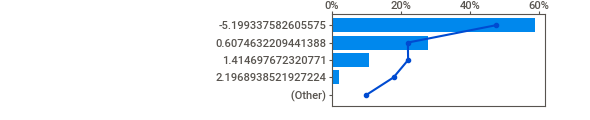
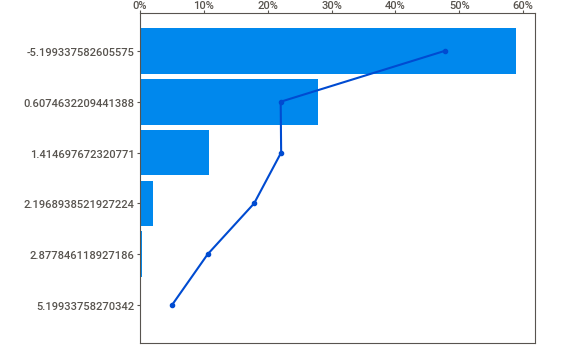
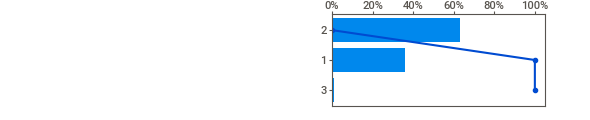
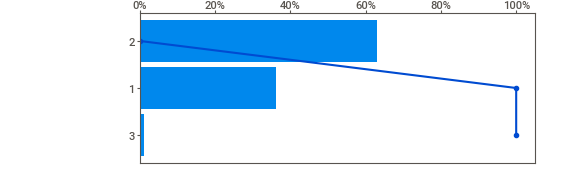
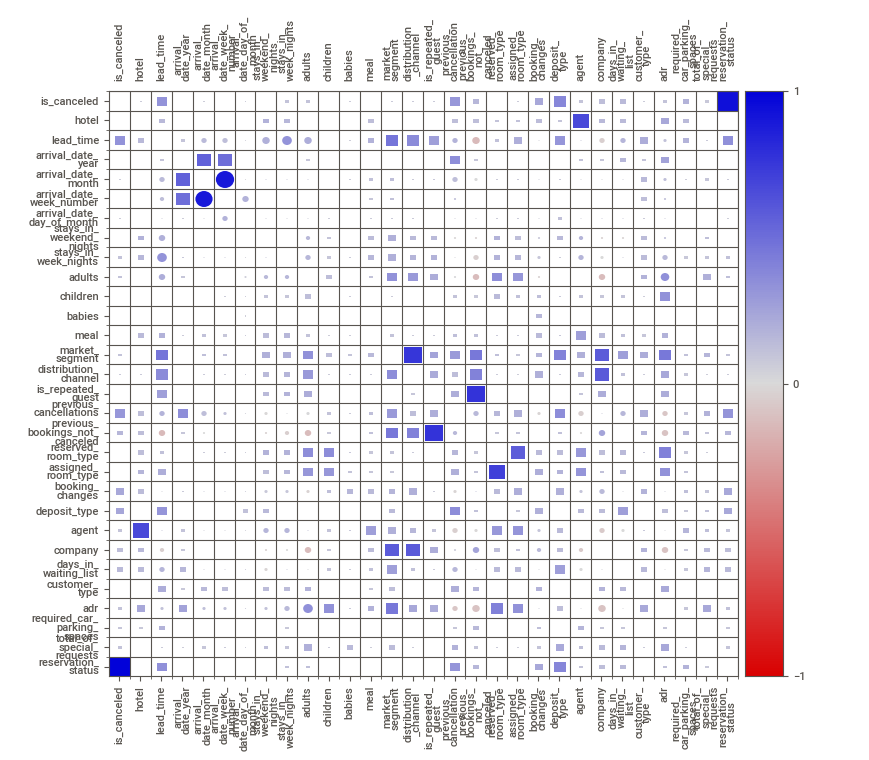
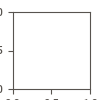

In [179]:
report.show_notebook()

## Train-Test Split

In [180]:
from sklearn.model_selection import train_test_split


In [197]:
# Select categorical columns for one-hot encoding
categorical_columns = ['country']

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(df[categorical_columns])
X_encoded = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out())


# Concatenate numerical and encoded categorical columns
X = pd.concat([df[numerical_columns], X_encoded], axis=1)
y = df['is_canceled']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train the decision tree classifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

# Predict cancellation on the test set
y_pred = dt.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.8052181924784321


Certainly! Here's a detailed description for each section of the code:

### Select categorical columns for one-hot encoding
```python
categorical_columns = ['country']
```
- **Purpose**: Specify which columns in the dataset contain categorical data that need to be converted into numerical format.
- **Description**: This line creates a list named `categorical_columns` that includes the column `country`. This indicates that the `country` column, which contains categorical data, will be transformed using one-hot encoding.

### Apply one-hot encoding to categorical columns
```python
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(df[categorical_columns])
X_encoded = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out())
```
- **Purpose**: Transform categorical data into a numerical format suitable for machine learning algorithms.
- **Description**:
  - `onehot_encoder`: Instantiates a `OneHotEncoder` object with `sparse=False` to return a dense array and `handle_unknown='ignore'` to ignore unknown categories during transformation.
  - `X_encoded`: Applies the one-hot encoding to the `country` column of the DataFrame `df`, resulting in a transformed array where each category in the `country` column is represented by a separate binary column.
  - `X_encoded = pd.DataFrame(...)`: Converts the encoded array back into a DataFrame, with column names obtained from `onehot_encoder.get_feature_names_out()`.

### Concatenate numerical and encoded categorical columns
```python
X = pd.concat([df[numerical_columns], X_encoded], axis=1)
y = df['is_canceled']
```
- **Purpose**: Combine the original numerical data with the newly one-hot encoded categorical data and prepare the target variable.
- **Description**:
  - `X`: Concatenates the original numerical columns (specified in `numerical_columns`) with the one-hot encoded columns (`X_encoded`) along the columns axis (`axis=1`). This forms the final feature set.
  - `y`: Extracts the target variable `is_canceled` from the DataFrame `df`, which indicates whether a booking was canceled.

### Split the dataset into training and test sets
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
```
- **Purpose**: Divide the dataset into training and testing sets to evaluate the model's performance.
- **Description**: Uses `train_test_split` from `sklearn.model_selection` to split the data. `test_size=0.2` allocates 20% of the data for testing, while `random_state=123` ensures reproducibility of the split.

### Train the decision tree classifier
```python
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)
```
- **Purpose**: Create and train a decision tree classifier to predict cancellations.
- **Description**:
  - `dt`: Instantiates a `DecisionTreeClassifier` with a maximum depth of 9 to prevent overfitting.
  - `dt.fit(...)`: Trains the decision tree classifier using the training data (`X_train` and `y_train`).

### Predict cancellation on the test set
```python
y_pred = dt.predict(X_test)
```
- **Purpose**: Make predictions on the test set using the trained model.
- **Description**: Uses the trained decision tree classifier to predict the target variable (`is_canceled`) for the test set features (`X_test`).

### Evaluate the model
```python
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
```
- **Purpose**: Assess the model's performance on the test set.
- **Description**:
  - `accuracy`: Computes the accuracy of the model by comparing the predicted values (`y_pred`) with the true values (`y_test`).
  - `print("Accuracy:", accuracy)`: Outputs the accuracy of the model to the console.

This code effectively prepares the data, trains a decision tree classifier, makes predictions, and evaluates the performance of the model using accuracy as the metric.

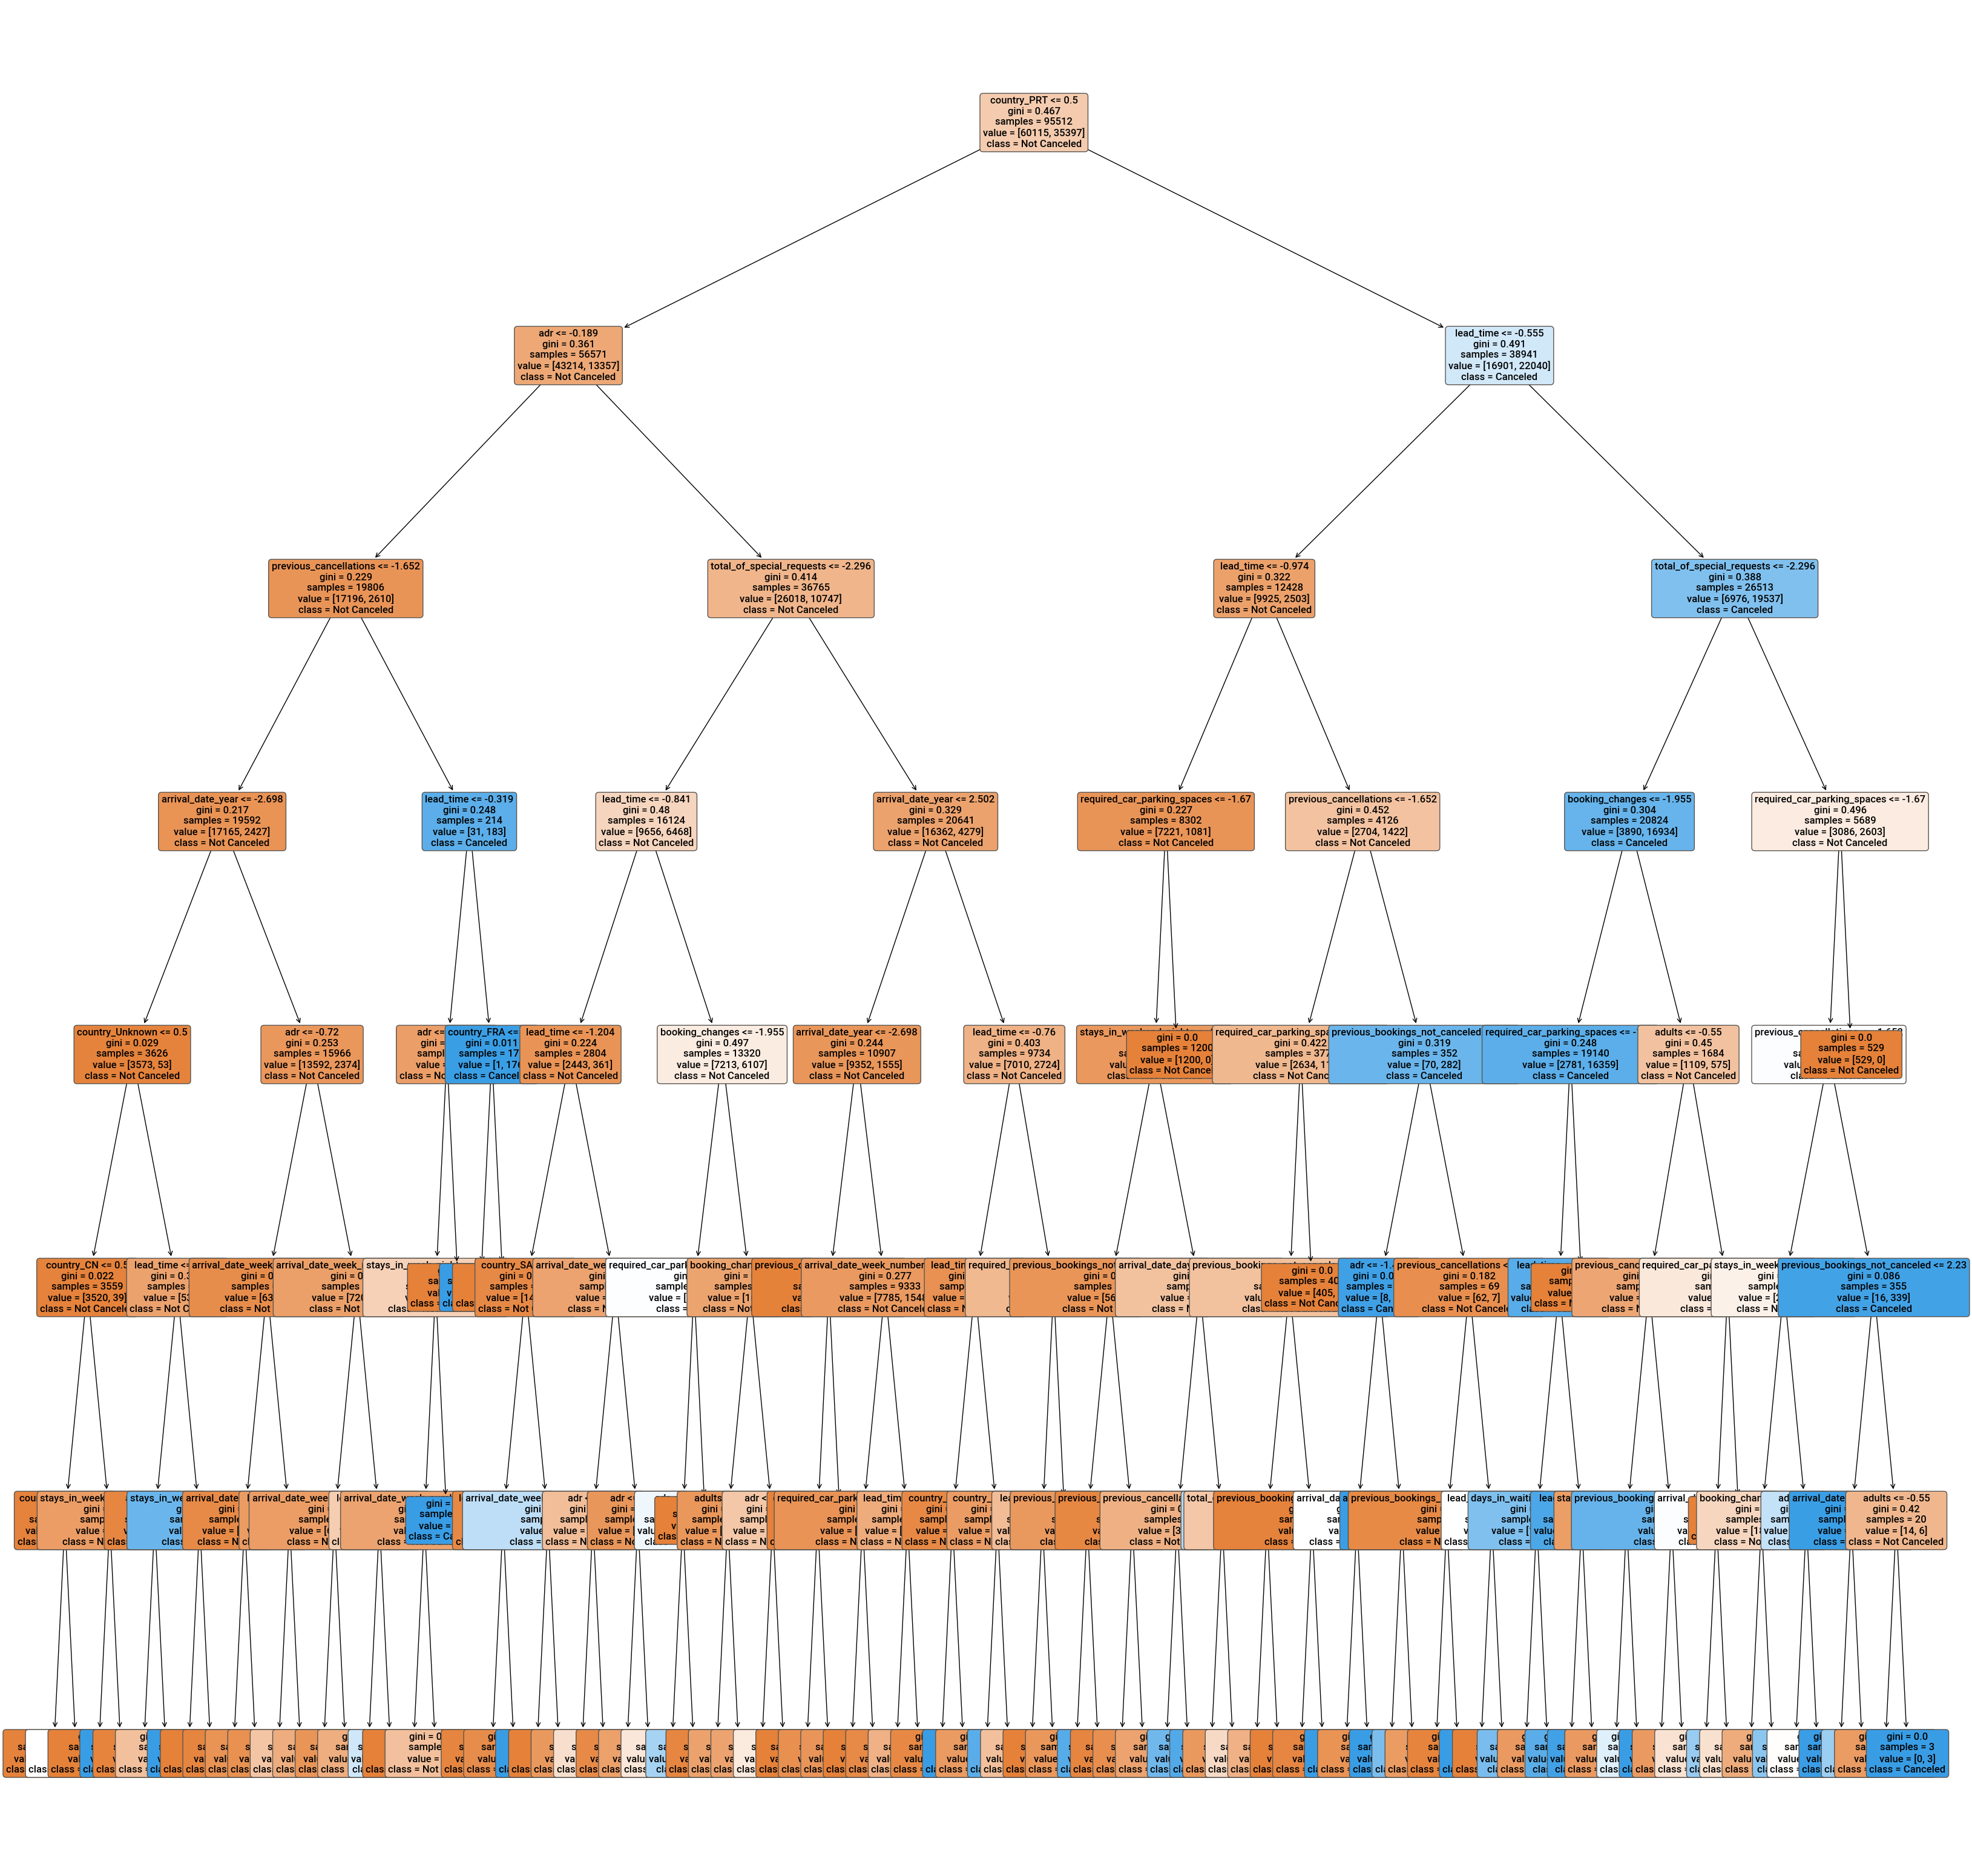

In [190]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Plot the decision tree with filled nodes and rounded corners
plt.figure(figsize=(40, 40))  # Adjust the figure size as needed
plot_tree(dt, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'], filled=True, rounded=True, fontsize=12)
plt.show()


In [192]:
from sklearn.tree import export_text

# Export the decision tree rules to text format
tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)


|--- country_PRT <= 0.50
|   |--- adr <= -0.19
|   |   |--- previous_cancellations <= -1.65
|   |   |   |--- arrival_date_year <= -2.70
|   |   |   |   |--- country_Unknown <= 0.50
|   |   |   |   |   |--- country_CN <= 0.50
|   |   |   |   |   |   |--- country_MOZ <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- country_MOZ >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- country_CN >  0.50
|   |   |   |   |   |   |--- stays_in_week_nights <= 1.74
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- stays_in_week_nights >  1.74
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- country_Unknown >  0.50
|   |   |   |   |   |--- lead_time <= 0.65
|   |   |   |   |   |   |--- adr <= -0.57
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- adr >  -0.57
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lead_time >  0.65
|   |   |   |   |   |   |--- stays_in_week_nights 

Here's a detailed description for each section of the code:

### Import necessary libraries
```python
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
```
- **Purpose**: Import libraries needed for plotting the decision tree.
- **Description**:
  - `plot_tree` from `sklearn.tree`: Provides a visualization of the decision tree.
  - `pyplot` from `matplotlib`: Used for creating the plot.

### Plot the decision tree with filled nodes and rounded corners
```python
plt.figure(figsize=(40, 40))  # Adjust the figure size as needed
plot_tree(dt, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'], filled=True, rounded=True, fontsize=12)
plt.show()
```
- **Purpose**: Visualize the trained decision tree in a readable and interpretable format.
- **Description**:
  - `plt.figure(figsize=(40, 40))`: Sets the size of the plot to 40x40 inches. The size can be adjusted as needed to ensure the tree fits well within the figure and is readable.
  - `plot_tree(...)`:
    - `dt`: The trained decision tree classifier to be visualized.
    - `feature_names=X.columns`: Labels each node in the tree with the corresponding feature names from the dataset.
    - `class_names=['Not Canceled', 'Canceled']`: Labels the target classes (0 as 'Not Canceled' and 1 as 'Canceled').
    - `filled=True`: Fills the nodes with colors to represent different classes, making the tree easier to interpret.
    - `rounded=True`: Rounds the corners of the nodes for a cleaner look.
    - `fontsize=12`: Sets the font size of the text within the plot for better readability.
  - `plt.show()`: Displays the plot.

### Full code with descriptions
Here is the entire code with descriptions integrated:
```python
# Import necessary libraries
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Plot the decision tree with filled nodes and rounded corners
plt.figure(figsize=(40, 40))  # Adjust the figure size as needed
plot_tree(dt, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'], filled=True, rounded=True, fontsize=12)
plt.show()
```
- **Purpose**: Visualize the trained decision tree.
- **Description**:
  - Import the required functions for plotting.
  - Create a figure with specified dimensions to accommodate the decision tree plot.
  - Use `plot_tree` to visualize the decision tree with specified parameters for clarity and readability.
  - Display the plot using `plt.show()`.

In [194]:
# Score on training data
score_train = dt.score(X_train, y_train)
print("Score on training data:", score_train)


Score on training data: 0.8019725270123126


In [195]:
# Score on testing data
score_test = dt.score(X_test, y_test)
print("Score on testing data:", score_test)


Score on testing data: 0.7978892704581623
